### Dependencies

In [1]:
import random
import time

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Markdown, display
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm

rnd_seed_state = 1

### Configuration

In [2]:
    
def pre_config():
    plt.rcParams.update({'font.size': 20})
    random.seed(rnd_seed_state)
    %matplotlib inline
    

In [3]:
pre_config()

### Loading dataset

In [4]:
def load_dataset():
    df_etf = pd.read_csv('dataset/ETFs.csv', index_col=False)
    df_mf = pd.read_csv('dataset/Mutual Funds.csv', index_col=False)

    return df_etf, df_mf

In [5]:
df_etf, df_mf = load_dataset()

C:\Users\NVukobrat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### ETFs Visualization

In [6]:
def types(df):
    for c, t in zip(df, df.dtypes):
        if np.issubdtype(t, np.number):
            print("Num", c, t)
        else:
            print("Str", c, t)

In [7]:
types(df_etf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Str legal_type object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num price_earnings float64
Num price_book float64
Num price_sales float64
Num price_cashflow float64
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num rating_us_government float64
Num rating_aaa float64
Num rating_aa float64
Num rating_a float64
Num rating_bbb float64
Num rating_bb float64
Num rating_b float64
Num rating_below_b float64
Num rating_others float64
Num

In [8]:
def describe(df):
    print("DataFrame summary:")
    print(df.info())
    print()

    print("Columns summary:")
    for col in list(df):
        print(col)
        print(df[col].dropna().describe())
        print(df[col].dropna().value_counts())
        print()
  

In [9]:
describe(df_etf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Columns: 104 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(94), object(10)
memory usage: 1.9+ MB
None

Columns summary:
fund_name
count     2352
unique    2352
top       SPEM
freq         1
Name: fund_name, dtype: object
SPEM    1
ILF     1
LEMB    1
FCEF    1
PSET    1
       ..
VNLA    1
1387    1
DEM     1
OEUR    1
ADRE    1
Name: fund_name, Length: 2352, dtype: int64

fund_extended_name
count                 2352
unique                2340
top       SPDR Gold Shares
freq                     2
Name: fund_extended_name, dtype: object
SPDR Gold Shares                                             2
iShares JPX-Nikkei 400 ETF                                   2
iShares S&P 100 ETF                                          2
iShares Russell 2000 ETF                                     2
SPDR S&P 500 ETF                                             2
                          

count    2348.000000
mean        6.518727
std        14.562285
min         0.000000
25%         0.000000
50%         0.000000
75%         9.432500
max       100.000000
Name: healthcare, dtype: float64
0.00      1185
100.00      19
14.49        7
9.80         5
11.43        4
          ... 
6.85         1
2.45         1
6.73         1
6.46         1
11.00        1
Name: healthcare, Length: 860, dtype: int64

utilities
count    2348.000000
mean        3.428616
std        10.072451
min         0.000000
25%         0.000000
50%         0.000000
75%         3.342500
max       100.000000
Name: utilities, dtype: float64
0.00     1274
3.19        9
3.33        8
3.14        7
3.30        7
         ... 
7.82        1
11.02       1
8.46        1
8.69        1
8.78        1
Name: utilities, Length: 669, dtype: int64

communication_services
count    2348.000000
mean        2.259919
std         4.405158
min         0.000000
25%         0.000000
50%         0.000000
75%         3.560000
max        

Name: fund_return_2010, dtype: float64
 26.36    3
 12.32    3
 26.76    3
 14.93    3
 9.29     3
         ..
 17.80    1
 3.41     1
 31.56    1
 16.59    1
-2.00     1
Name: fund_return_2010, Length: 786, dtype: int64

fund_alpha_3years
count    2251.000000
mean       -0.397375
std         6.054392
min       -65.680000
25%        -1.595000
50%         0.000000
75%         0.970000
max        53.170000
Name: fund_alpha_3years, dtype: float64
 0.00     466
-0.18       9
-0.64       8
-0.33       8
-0.28       8
         ... 
 2.31       1
 10.58      1
-3.85       1
-26.59      1
 6.58       1
Name: fund_alpha_3years, Length: 1032, dtype: int64

category_alpha_3years
count    1451.000000
mean        0.281516
std         4.651445
min       -16.860000
25%        -1.880000
50%         0.320000
75%         2.150000
max        14.890000
Name: category_alpha_3years, dtype: float64
-0.65    114
 0.43     81
-1.88     69
-2.82     62
 0.72     52
        ... 
 1.73      3
 1.42      3
-0.35  

Name: fund_standard_deviation_10years, dtype: float64
0.00     1272
17.04       4
12.79       3
13.18       3
14.69       3
         ... 
33.36       1
10.92       1
34.10       1
14.53       1
17.00       1
Name: fund_standard_deviation_10years, Length: 616, dtype: int64

category_standard_deviation_10years
count    1131.000000
mean       19.305906
std         5.770445
min         1.340000
25%        15.870000
50%        19.030000
75%        21.980000
max        40.900000
Name: category_standard_deviation_10years, dtype: float64
15.42    114
15.87     81
24.73     69
19.03     51
20.82     48
16.71     45
18.48     41
20.30     35
19.29     35
18.41     34
17.05     34
24.13     32
21.60     32
25.87     31
25.59     30
18.24     25
26.06     23
27.21     23
18.05     22
21.28     22
24.61     22
21.69     21
19.53     21
21.98     21
7.10      20
15.81     19
34.82     18
19.70     15
17.04     15
3.26      15
10.52     15
12.20     14
6.30      12
21.78     11
40.90     11
13.92    

In [10]:
def hist_bar_plot(df, rc_num=(2, 6), size=(16 * 3, 9 * 3), unique=True):
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if 1 < num_unique_col[col] < 50]]

    # Create Hist and Bar plots
    plt.figure(figsize=size)
    for i, col in enumerate(df):
        plt.subplot(rc_num[0], rc_num[1], i + 1)
        df_column = df[col]
        if np.issubdtype(type(df_column.iloc[0]), np.number):
            df_column.hist()
        else:
            df_column.value_counts().plot.bar()
        plt.title(col, fontsize=25)
        plt.xticks(rotation=30, fontsize=30)
        plt.yticks(fontsize=30)
        plt.ylabel('counts')

        if i == 10:
            break
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

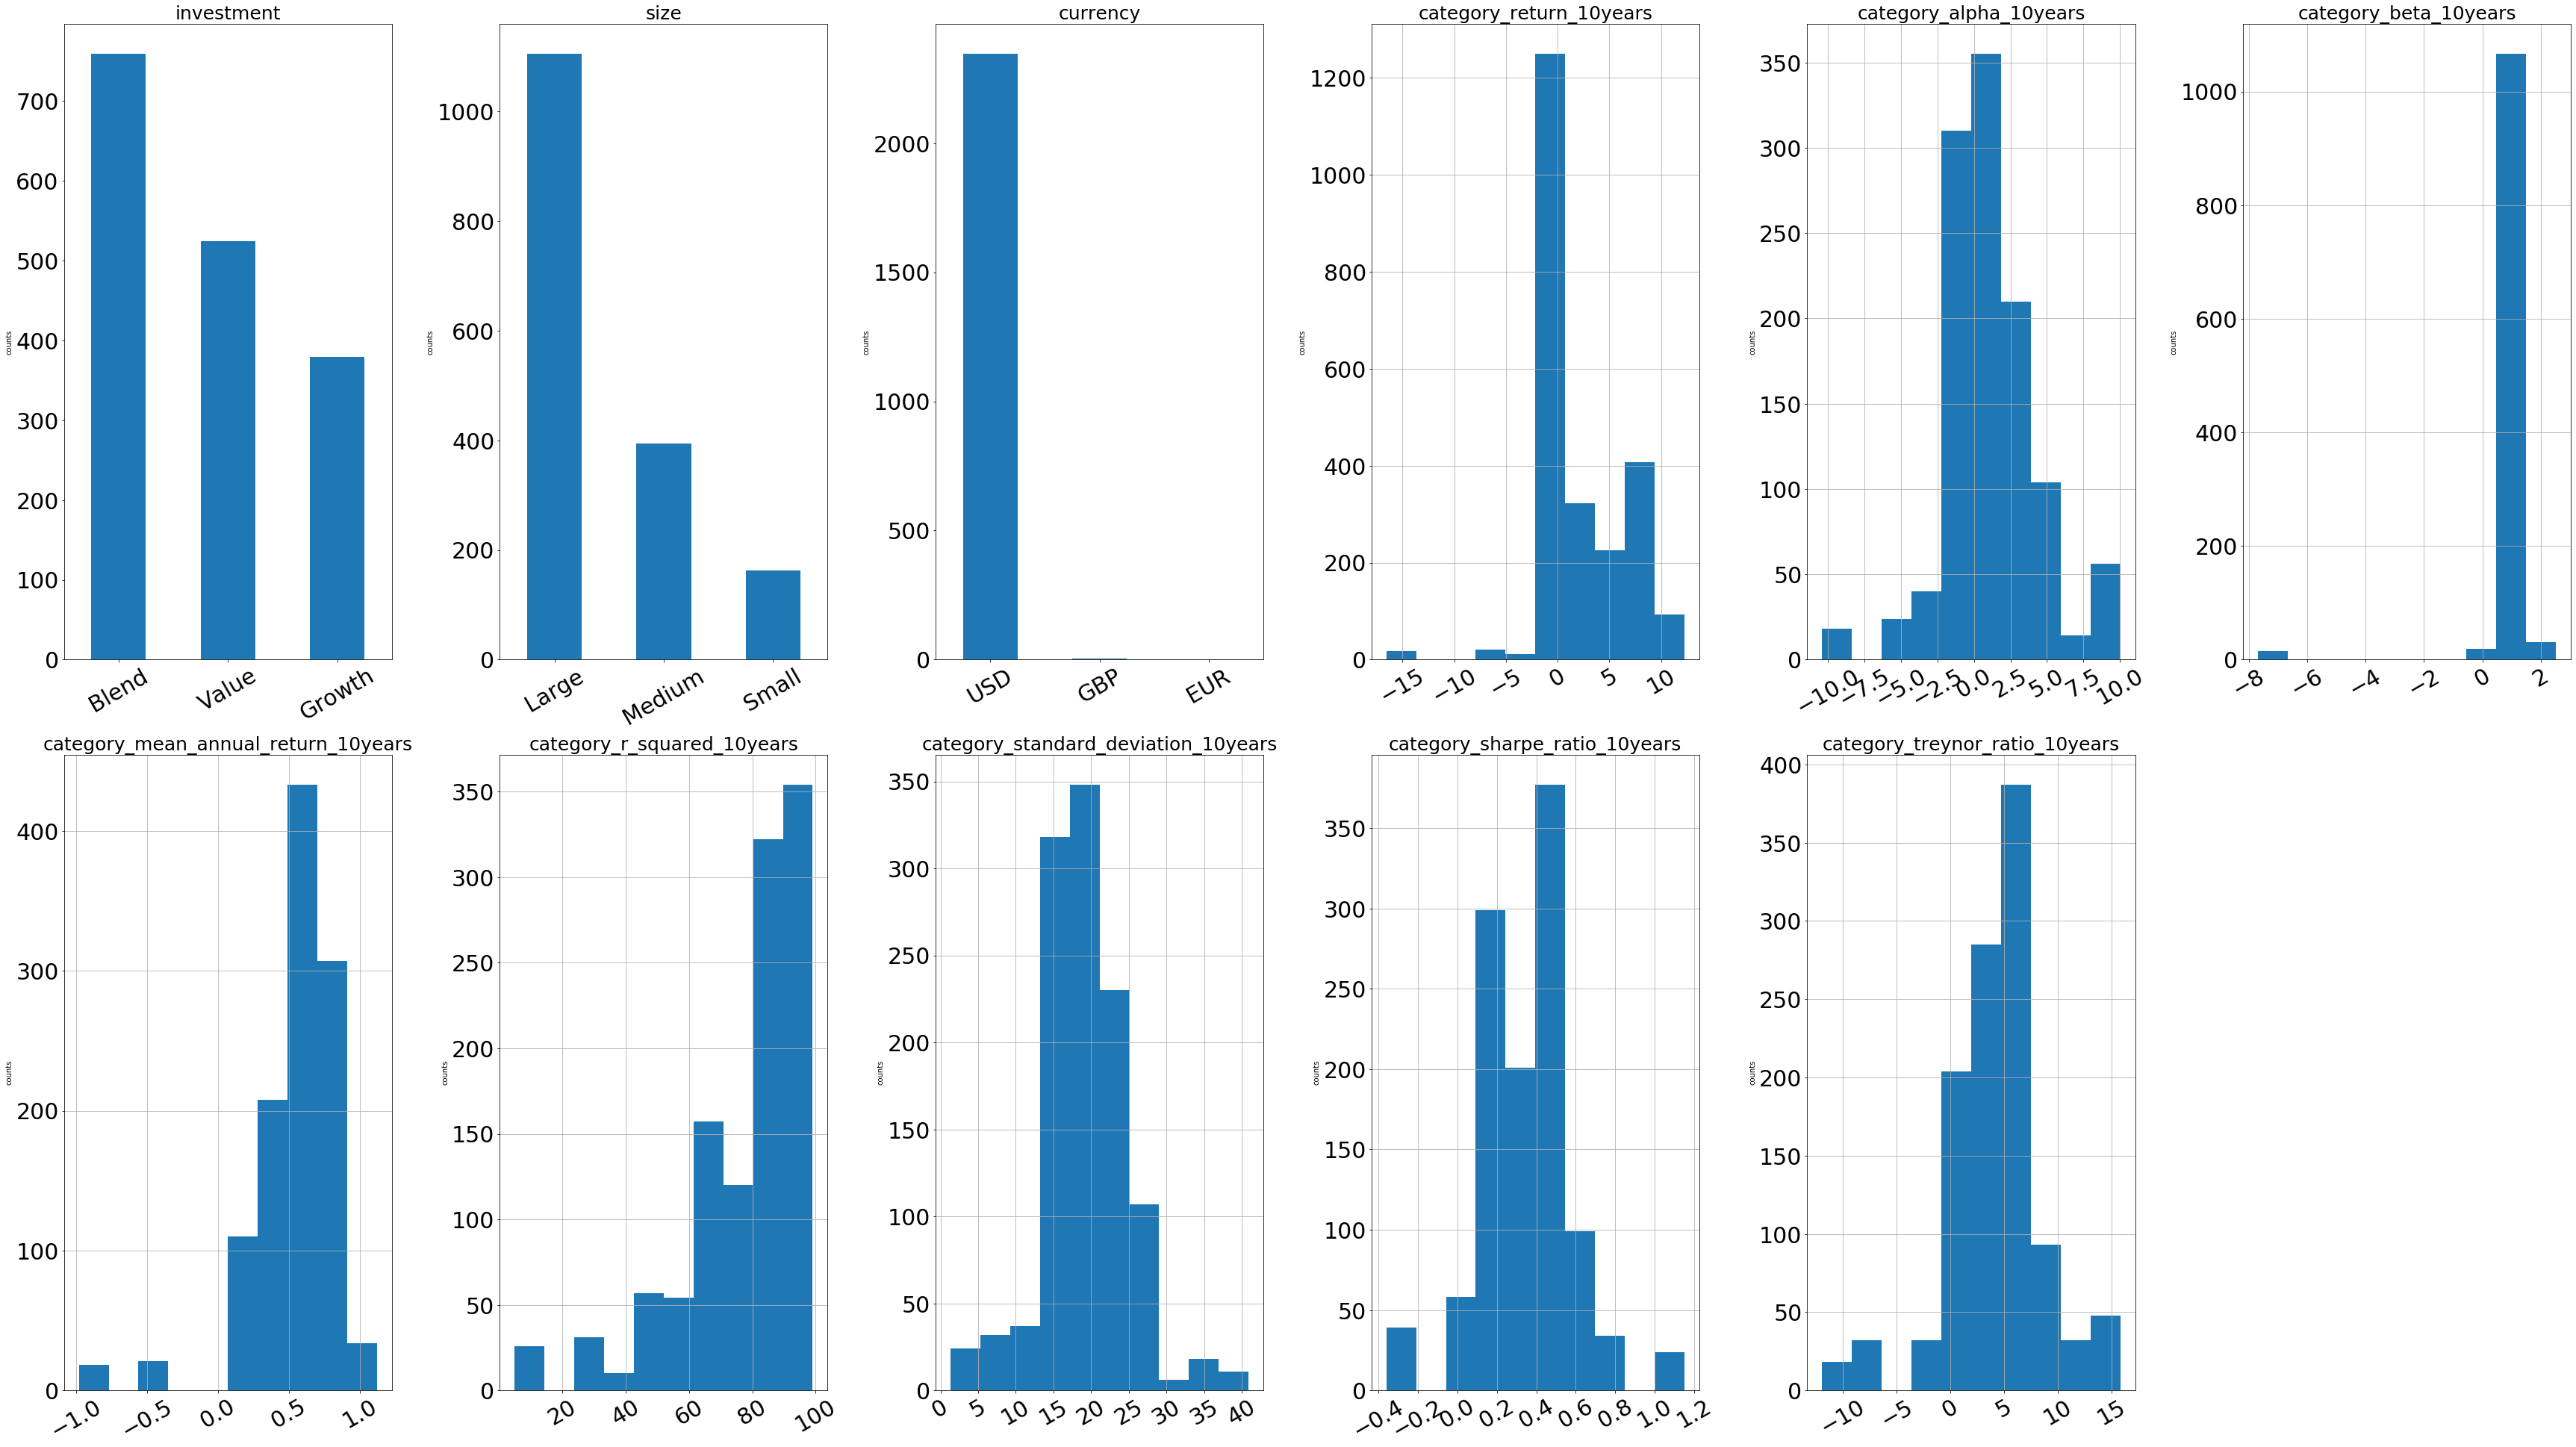

In [11]:
hist_bar_plot(df_etf)

In [12]:
def correlation_clean(df, threshold=(-0.9, -0.3, 0.3, 0.9)):
    # Fix for non-numerical (or too many nan) columns
    col_corr = {
        # ETFs
        'fund_name', 'fund_extended_name', 'category', 'fund_family', 'net_assets', 'legal_type', 'investment', 'size',
        'currency', 'rating_us_government', 'fund_treynor_ratio_3years', 'category_treynor_ratio_5years',
    }
    try:
        for col in col_corr:
            del df[col]
    except KeyError:
        pass  # legal_type

    # Chose numerical columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (not threshold[0] <= corr_matrix.iloc[i, j] <= threshold[1] and
                not threshold[2] <= corr_matrix.iloc[i, j] <= threshold[3]
            ) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname]

    return df

In [13]:
df_etf = correlation_clean(df_etf)

In [14]:
def corr_mtx(df, fig_size=50, unique=True):
    sns.set(font_scale=4.0)
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if num_unique_col[col] > 1]]

    f, ax = plt.subplots(figsize=(fig_size, fig_size))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.show()
    sns.set(font_scale=2.0)
    

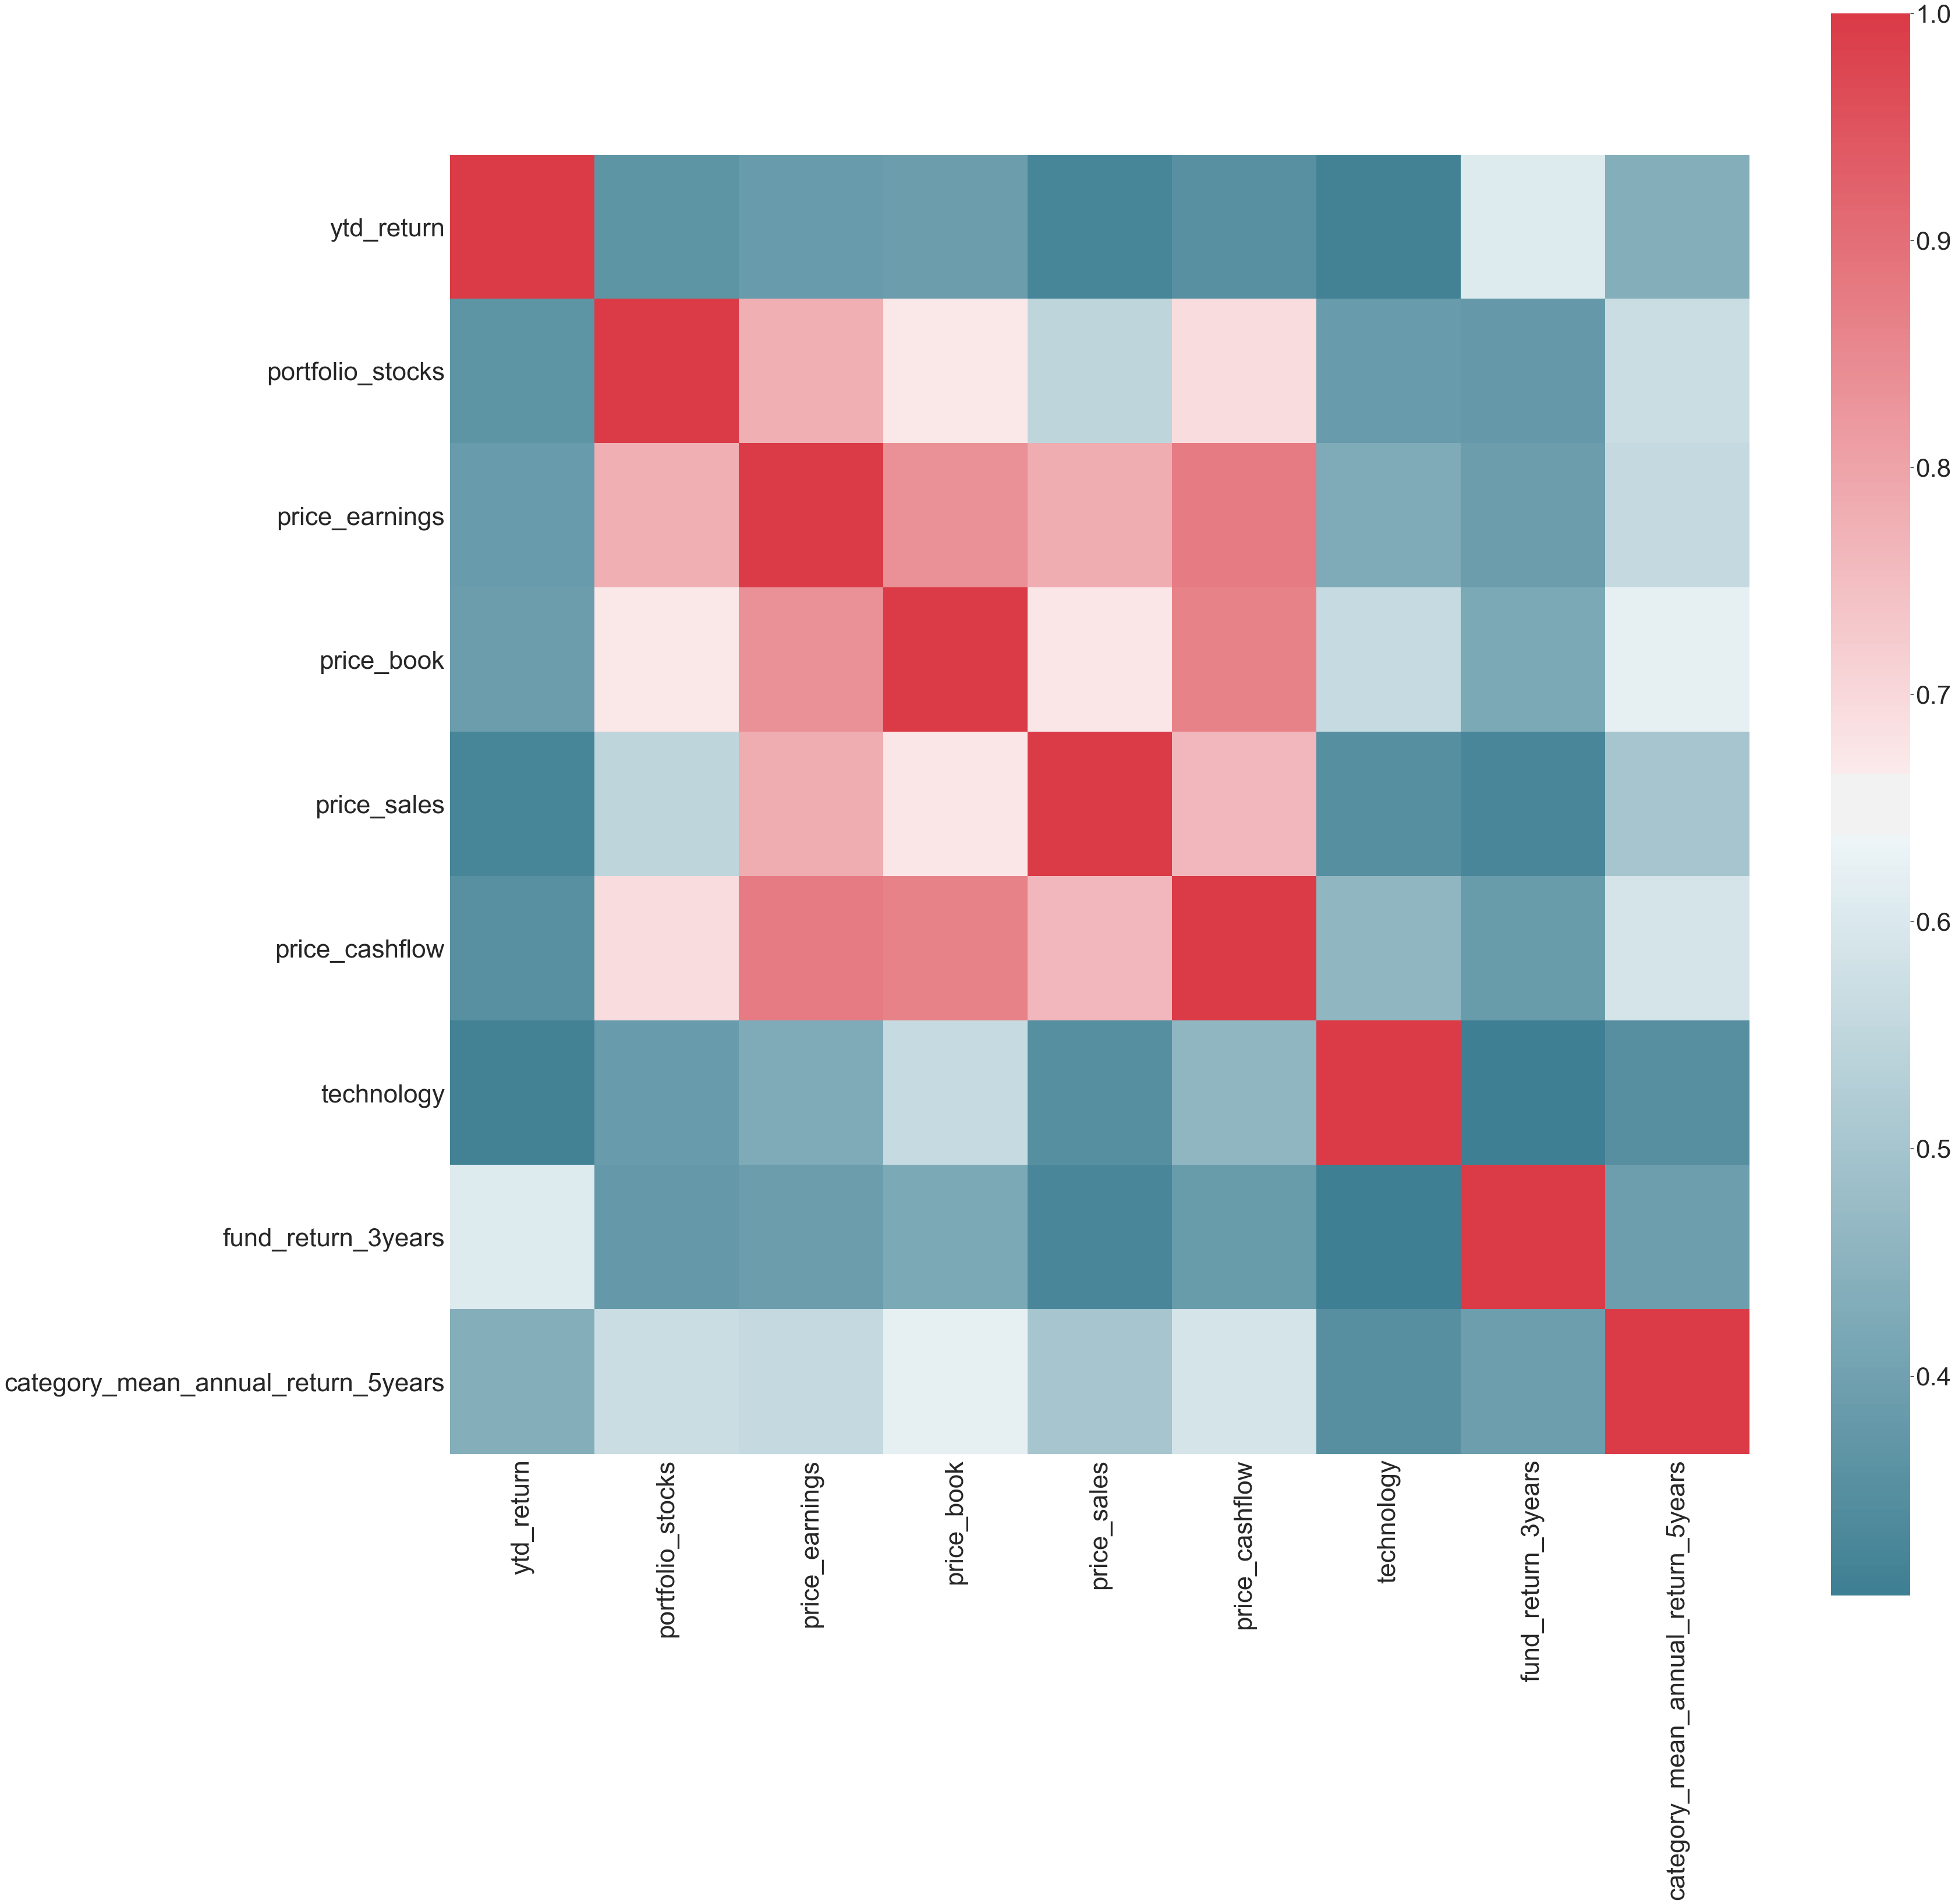

In [15]:
corr_mtx(df_etf, unique=False)

In [16]:
def scatter_mtx(df, figsize=50, cap=10):
    df = df.select_dtypes(np.number)
    if len(list(df)) > cap:
        df = df[list(df)[:cap]]
    scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(figsize, figsize), diagonal='kde')
    for ax in scatter_matrix.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=30, rotation=90)
        ax.set_ylabel(ax.get_ylabel(), fontsize=30, rotation=0)
    plt.show()

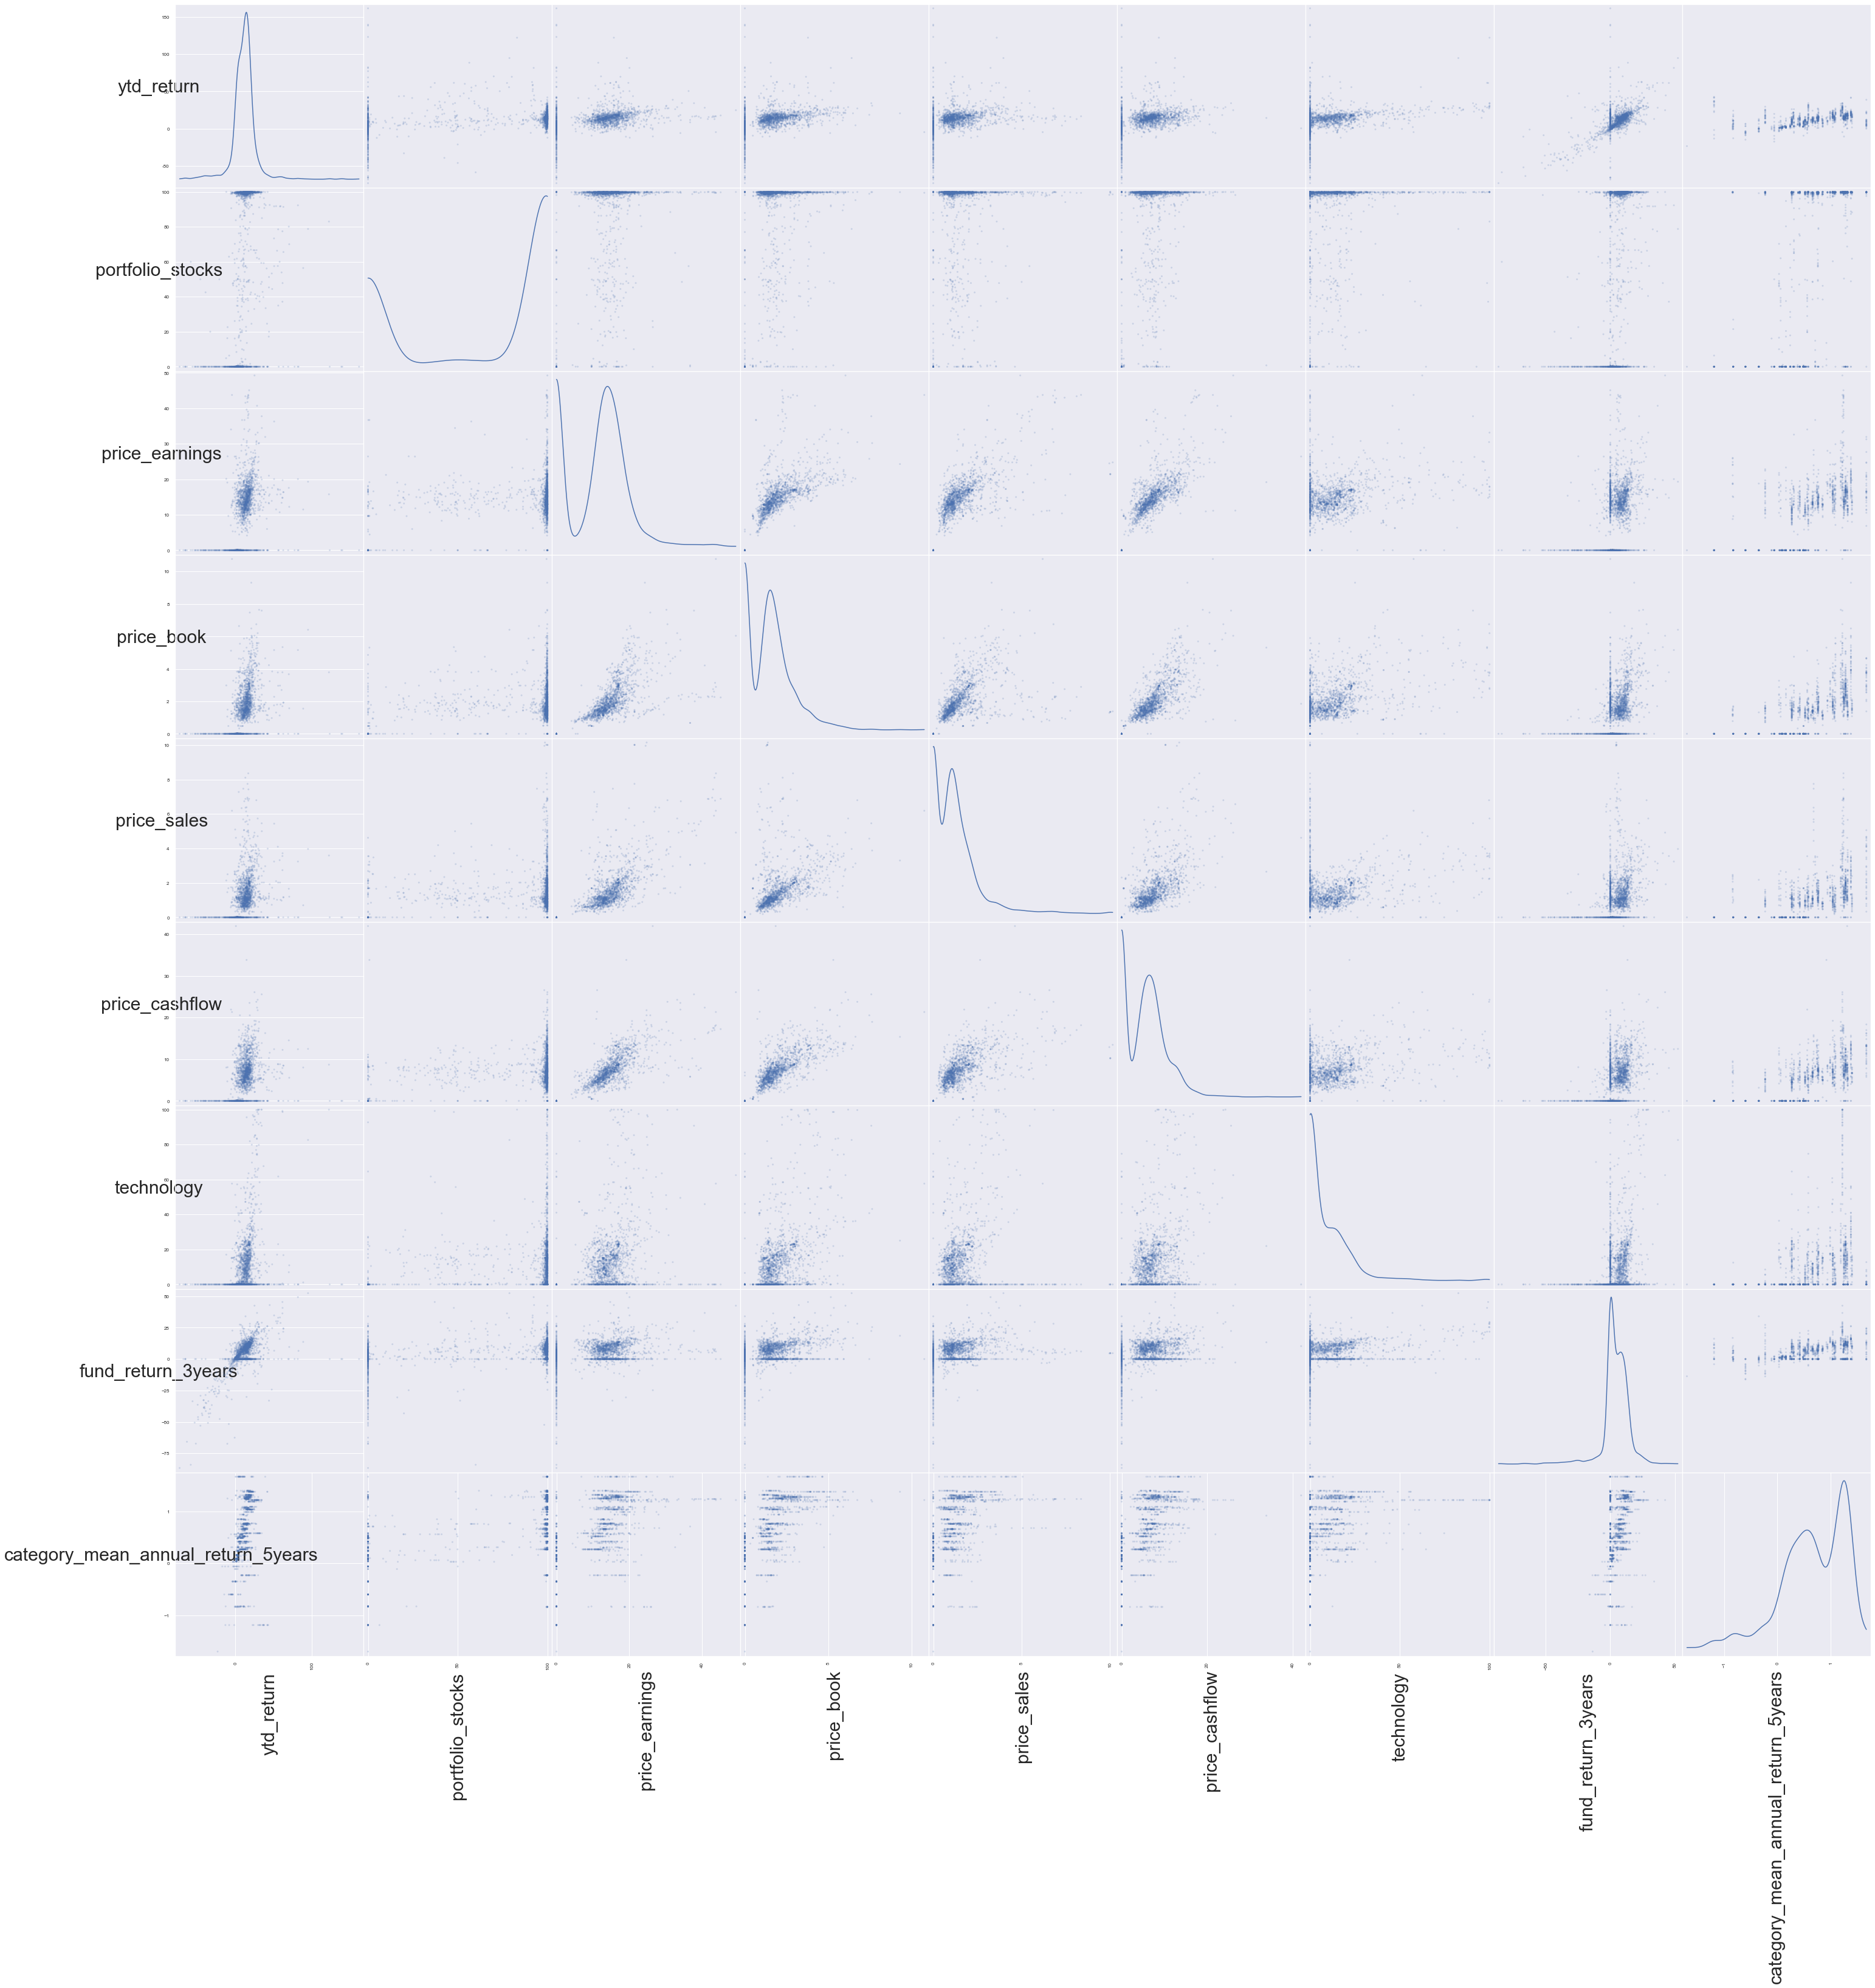

In [17]:
scatter_mtx(df_etf)

### MF Visualization

In [18]:
types(df_mf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Num morningstar_rating int64
Str inception_date object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_cash float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num portfolio_others float64
Num portfolio_preferred float64
Num portfolio_convertable float64
Str price_earnings object
Num price_book float64
Str price_sales object
Str price_cashflow object
Str median_market_cap object
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num bond_maturity float64
Num bond_durat

In [19]:
describe(df_mf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25308 entries, 0 to 25307
Columns: 125 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(109), int64(1), object(15)
memory usage: 24.1+ MB
None

Columns summary:
fund_name
count     25308
unique    25308
top       PRSMX
freq          1
Name: fund_name, dtype: object
PRSMX    1
FPNTX    1
TTRCX    1
SCSAX    1
HERSX    1
        ..
WFQWX    1
BUFMX    1
IHSIX    1
ORNAX    1
MXSWX    1
Name: fund_name, Length: 25308, dtype: int64

fund_extended_name
count                                                 25308
unique                                                25265
top       Calamos Investment Trust - Calamos Focus Growt...
freq                                                      4
Name: fund_extended_name, dtype: object
Calamos Investment Trust - Calamos Focus Growth Fund                               4
MainStay Funds Trust - MainStay Epoch Global Choice Fund                           4
Hatteras 

count    25193.000000
mean         3.901391
std          8.149343
min          0.000000
25%          0.000000
50%          2.790000
75%          5.060000
max        100.000000
Name: basic_materials, dtype: float64
0.00      8868
4.30        97
4.46        81
100.00      79
4.50        75
          ... 
25.94        1
10.27        1
16.24        1
7.37         1
8.59         1
Name: basic_materials, Length: 1301, dtype: int64

consumer_cyclical
count    25193.000000
mean         9.207006
std          9.706399
min          0.000000
25%          0.000000
50%         10.450000
75%         13.210000
max        100.000000
Name: consumer_cyclical, dtype: float64
0.00      7598
11.84       91
100.00      75
11.54       68
12.89       61
          ... 
8.94         1
2.06         1
4.13         1
0.84         1
48.54        1
Name: consumer_cyclical, Length: 1975, dtype: int64

financial_services
count    25193.000000
mean        11.834177
std         12.289409
min          0.000000
25%        

count    25191.000000
mean         2.736542
std          5.030327
min        -10.920000
25%          0.660000
50%          3.070000
75%          4.520000
max         17.480000
Name: category_return_1year, dtype: float64
 10.71    1345
 6.90     1288
 4.48     1132
 3.98     1129
 1.85      862
          ... 
 5.01       20
-5.55       16
-3.74       15
 4.71       13
-1.17        2
Name: category_return_1year, Length: 99, dtype: int64

fund_return_3years
count    25191.000000
mean         6.996639
std          5.457870
min        -36.020000
25%          2.810000
50%          6.820000
75%         10.220000
max         38.420000
Name: fund_return_3years, dtype: float64
 0.00     1559
 6.32       36
 7.12       36
 1.65       34
 1.67       32
          ... 
 18.89       1
-17.91       1
 21.90       1
-2.01        1
-8.23        1
Name: fund_return_3years, Length: 2656, dtype: int64

category_return_3years
count    25191.000000
mean         7.460206
std          4.447419
min        -19.7

Name: fund_alpha_5years, dtype: float64
-0.16     69
-0.12     67
-0.20     65
 0.16     63
-0.10     62
          ..
 8.99      1
-13.03     1
-9.24      1
 7.63      1
-10.00     1
Name: fund_alpha_5years, Length: 2024, dtype: int64

category_alpha_5years
count    25200.000000
mean        -0.008108
std          0.026424
min         -0.180000
25%         -0.020000
50%         -0.000000
75%          0.000000
max          0.080000
Name: category_alpha_5years, dtype: float64
-0.00    7587
-0.01    4899
-0.03    3147
 0.01    2330
-0.02    2192
 0.04    1197
 0.02    1043
-0.06     691
-0.07     421
-0.04     408
-0.05     387
 0.03     304
 0.08     178
-0.11     109
 0.06     104
-0.08      95
-0.18      78
 0.05      30
Name: category_alpha_5years, dtype: int64

fund_alpha_10years
count    16622.000000
mean         0.001299
std          3.279016
min        -25.970000
25%         -1.740000
50%         -0.300000
75%          1.290000
max         14.860000
Name: fund_alpha_10years, dtype:

 0.01    15217
 0.00     9817
-0.01      166
Name: category_sharpe_ratio_5years, dtype: int64

fund_sharpe_ratio_10years
count    16622.000000
mean         0.937074
std          0.342908
min         -6.580000
25%          0.800000
50%          0.960000
75%          1.120000
max          3.010000
Name: fund_sharpe_ratio_10years, dtype: float64
 0.98    378
 0.96    370
 0.92    366
 0.94    356
 0.97    313
        ... 
-0.87      1
-1.44      1
-0.63      1
-2.01      1
-1.72      1
Name: fund_sharpe_ratio_10years, Length: 322, dtype: int64

category_sharpe_ratio_10years
count    25200.000000
mean         0.009510
std          0.002259
min         -0.010000
25%          0.010000
50%          0.010000
75%          0.010000
max          0.010000
Name: category_sharpe_ratio_10years, dtype: float64
 0.01    24019
 0.00     1126
-0.01       55
Name: category_sharpe_ratio_10years, dtype: int64

fund_treynor_ratio_3years
count     23639
unique     5308
top         5.5
freq         28
Name: fu

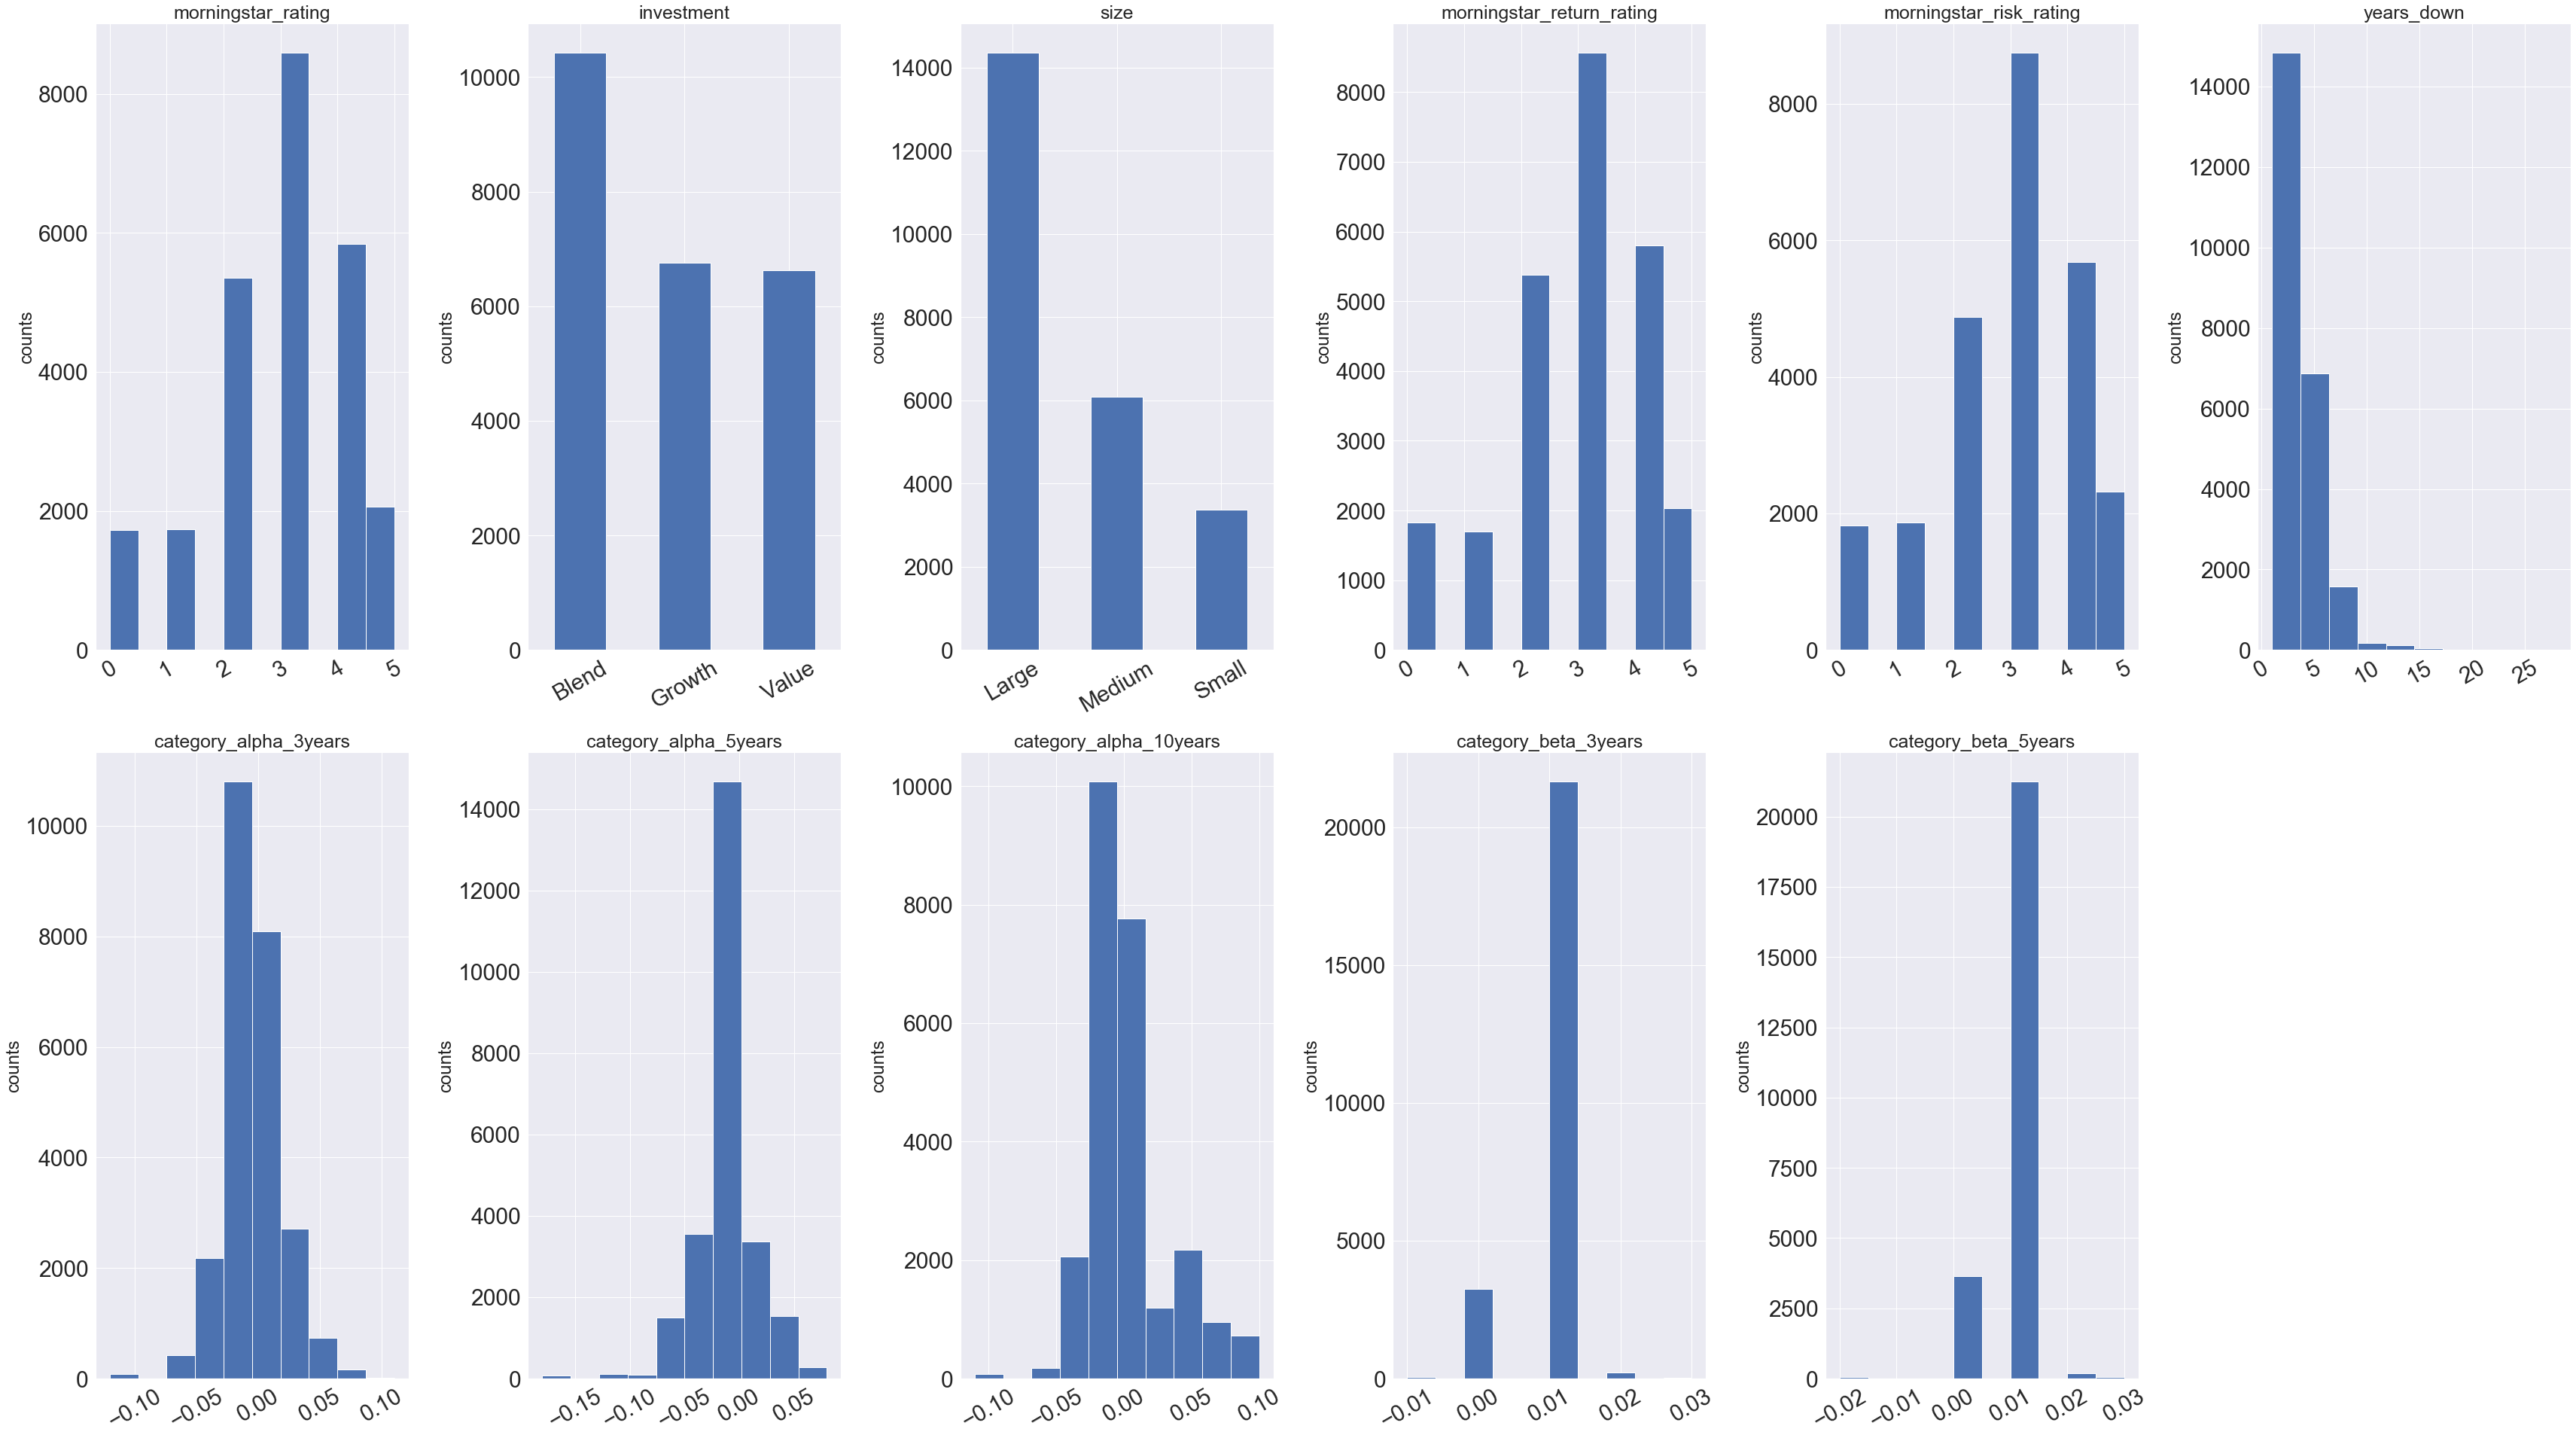

In [20]:
hist_bar_plot(df_mf)

In [21]:
df_mf = correlation_clean(df_mf, threshold=(-0.9, -0.6, 0.6, 0.9))

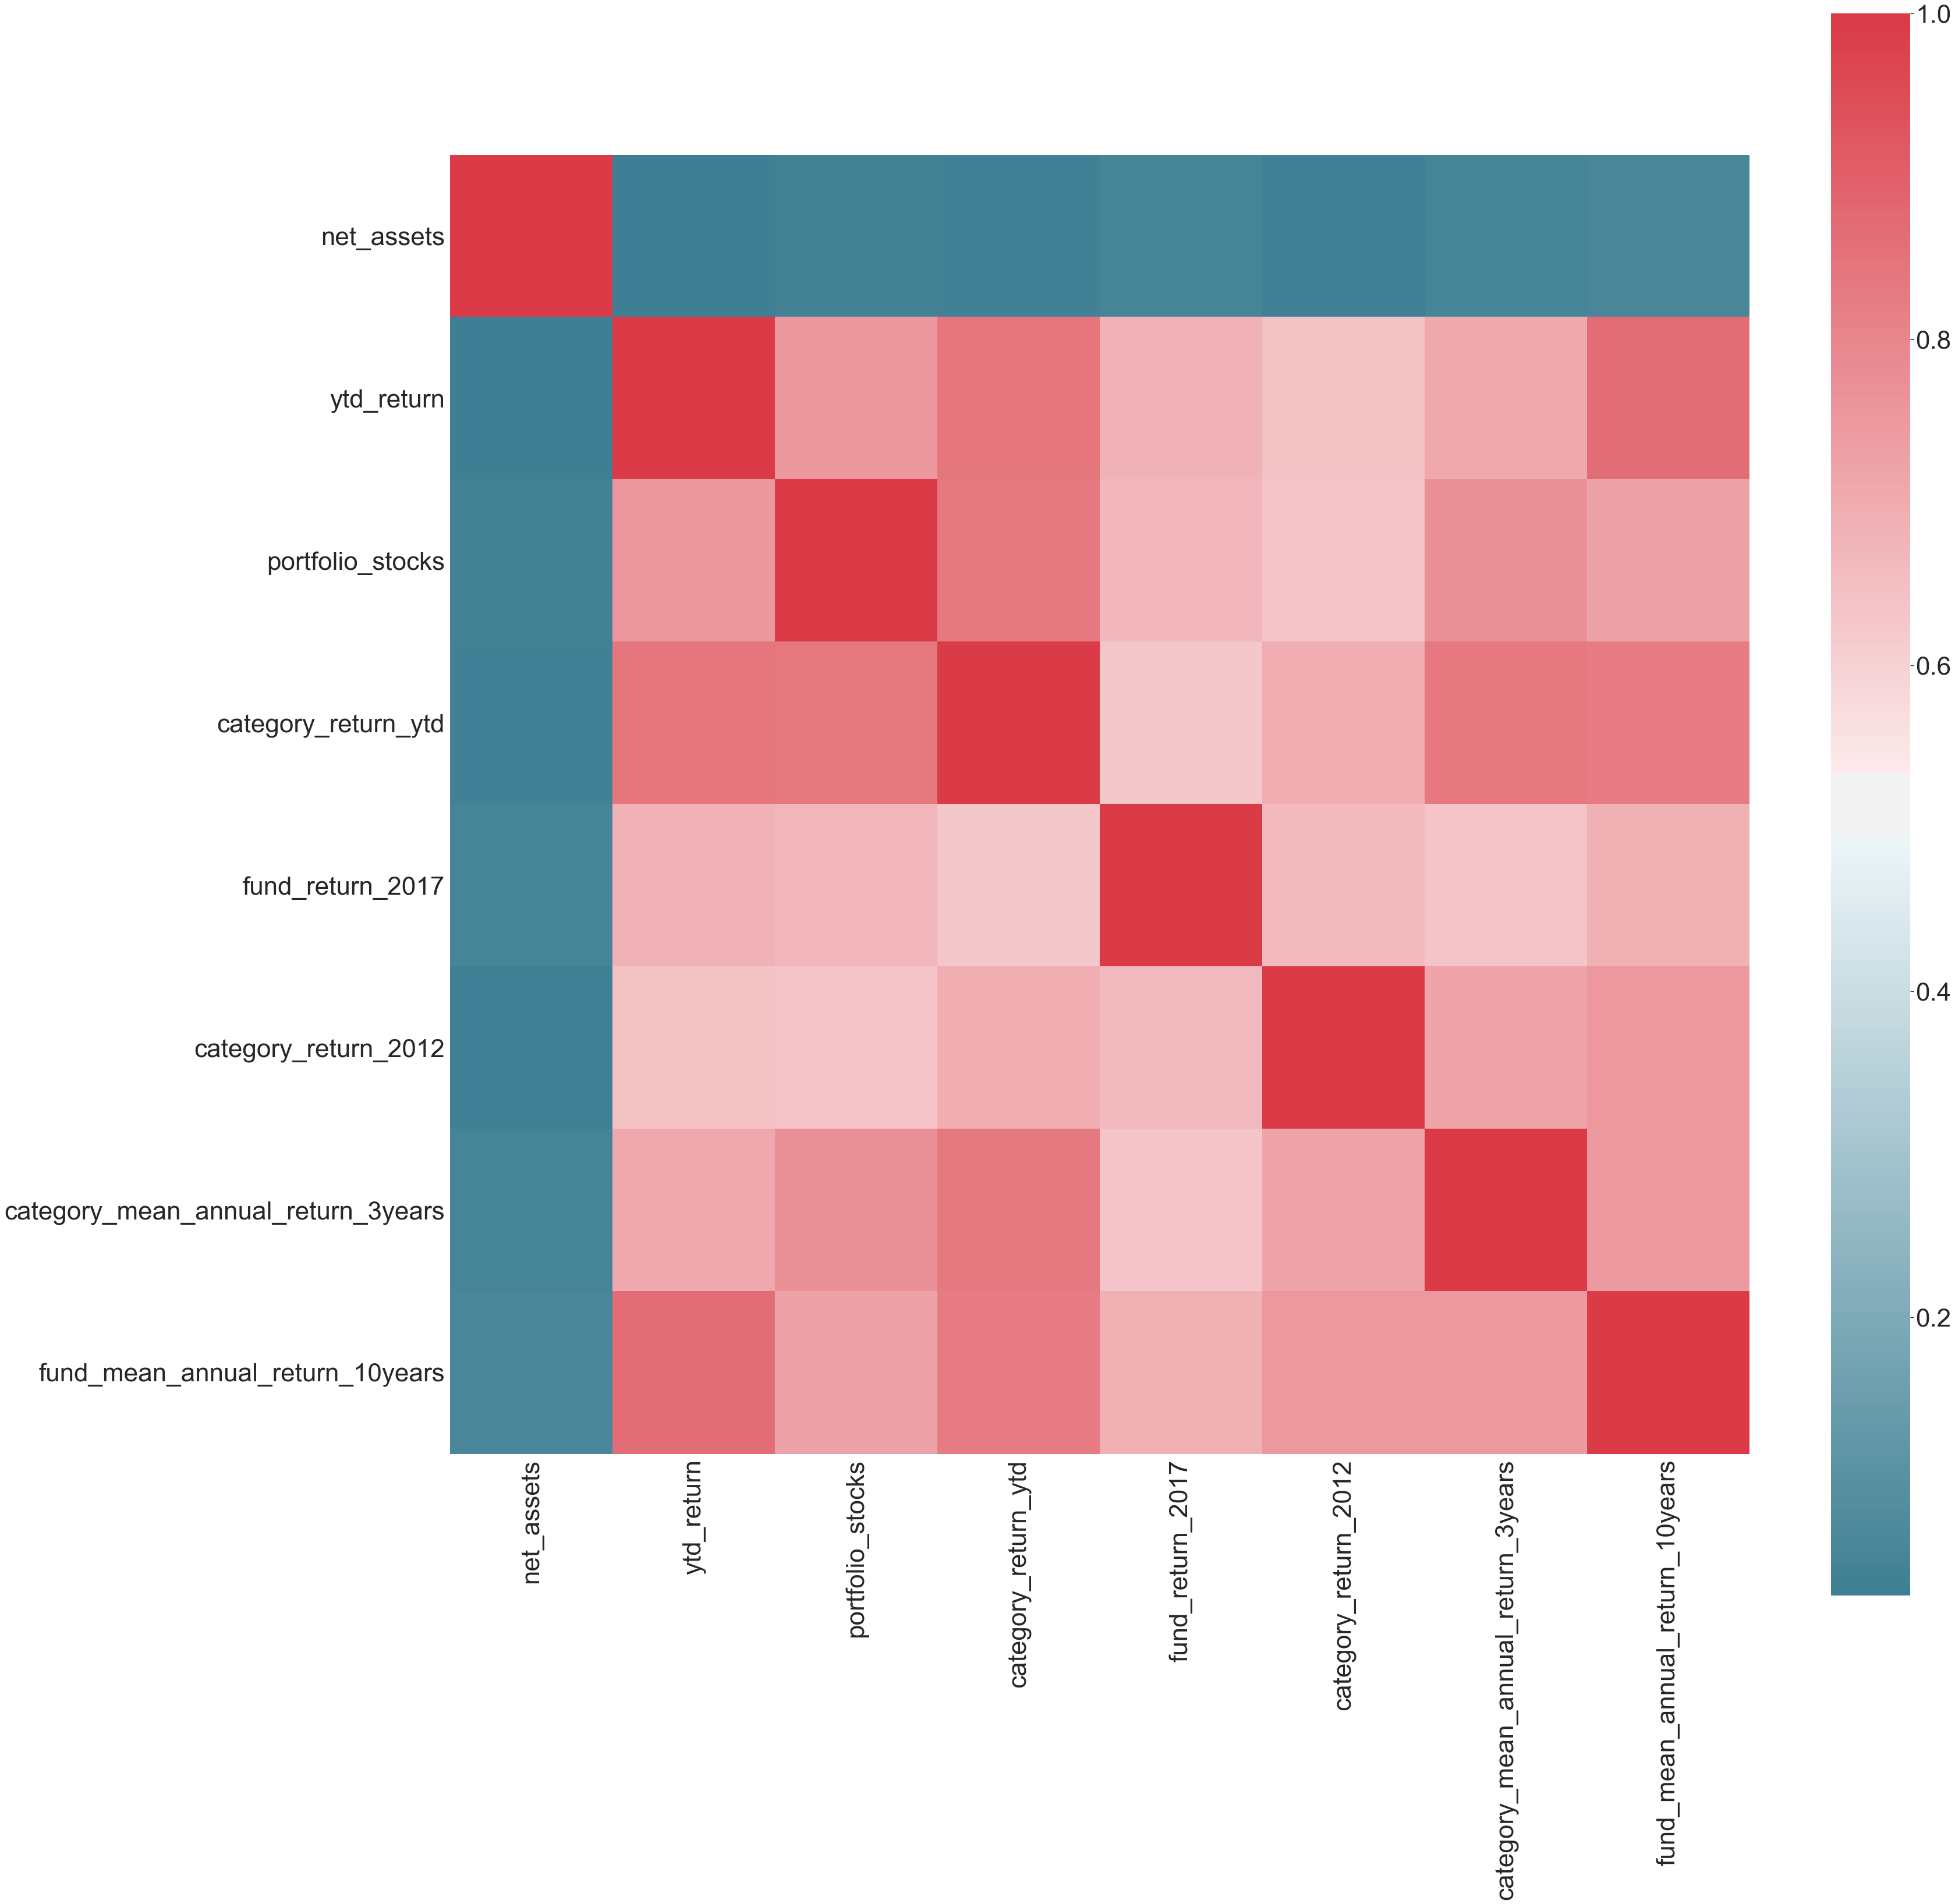

In [22]:
corr_mtx(df_mf, unique=False)

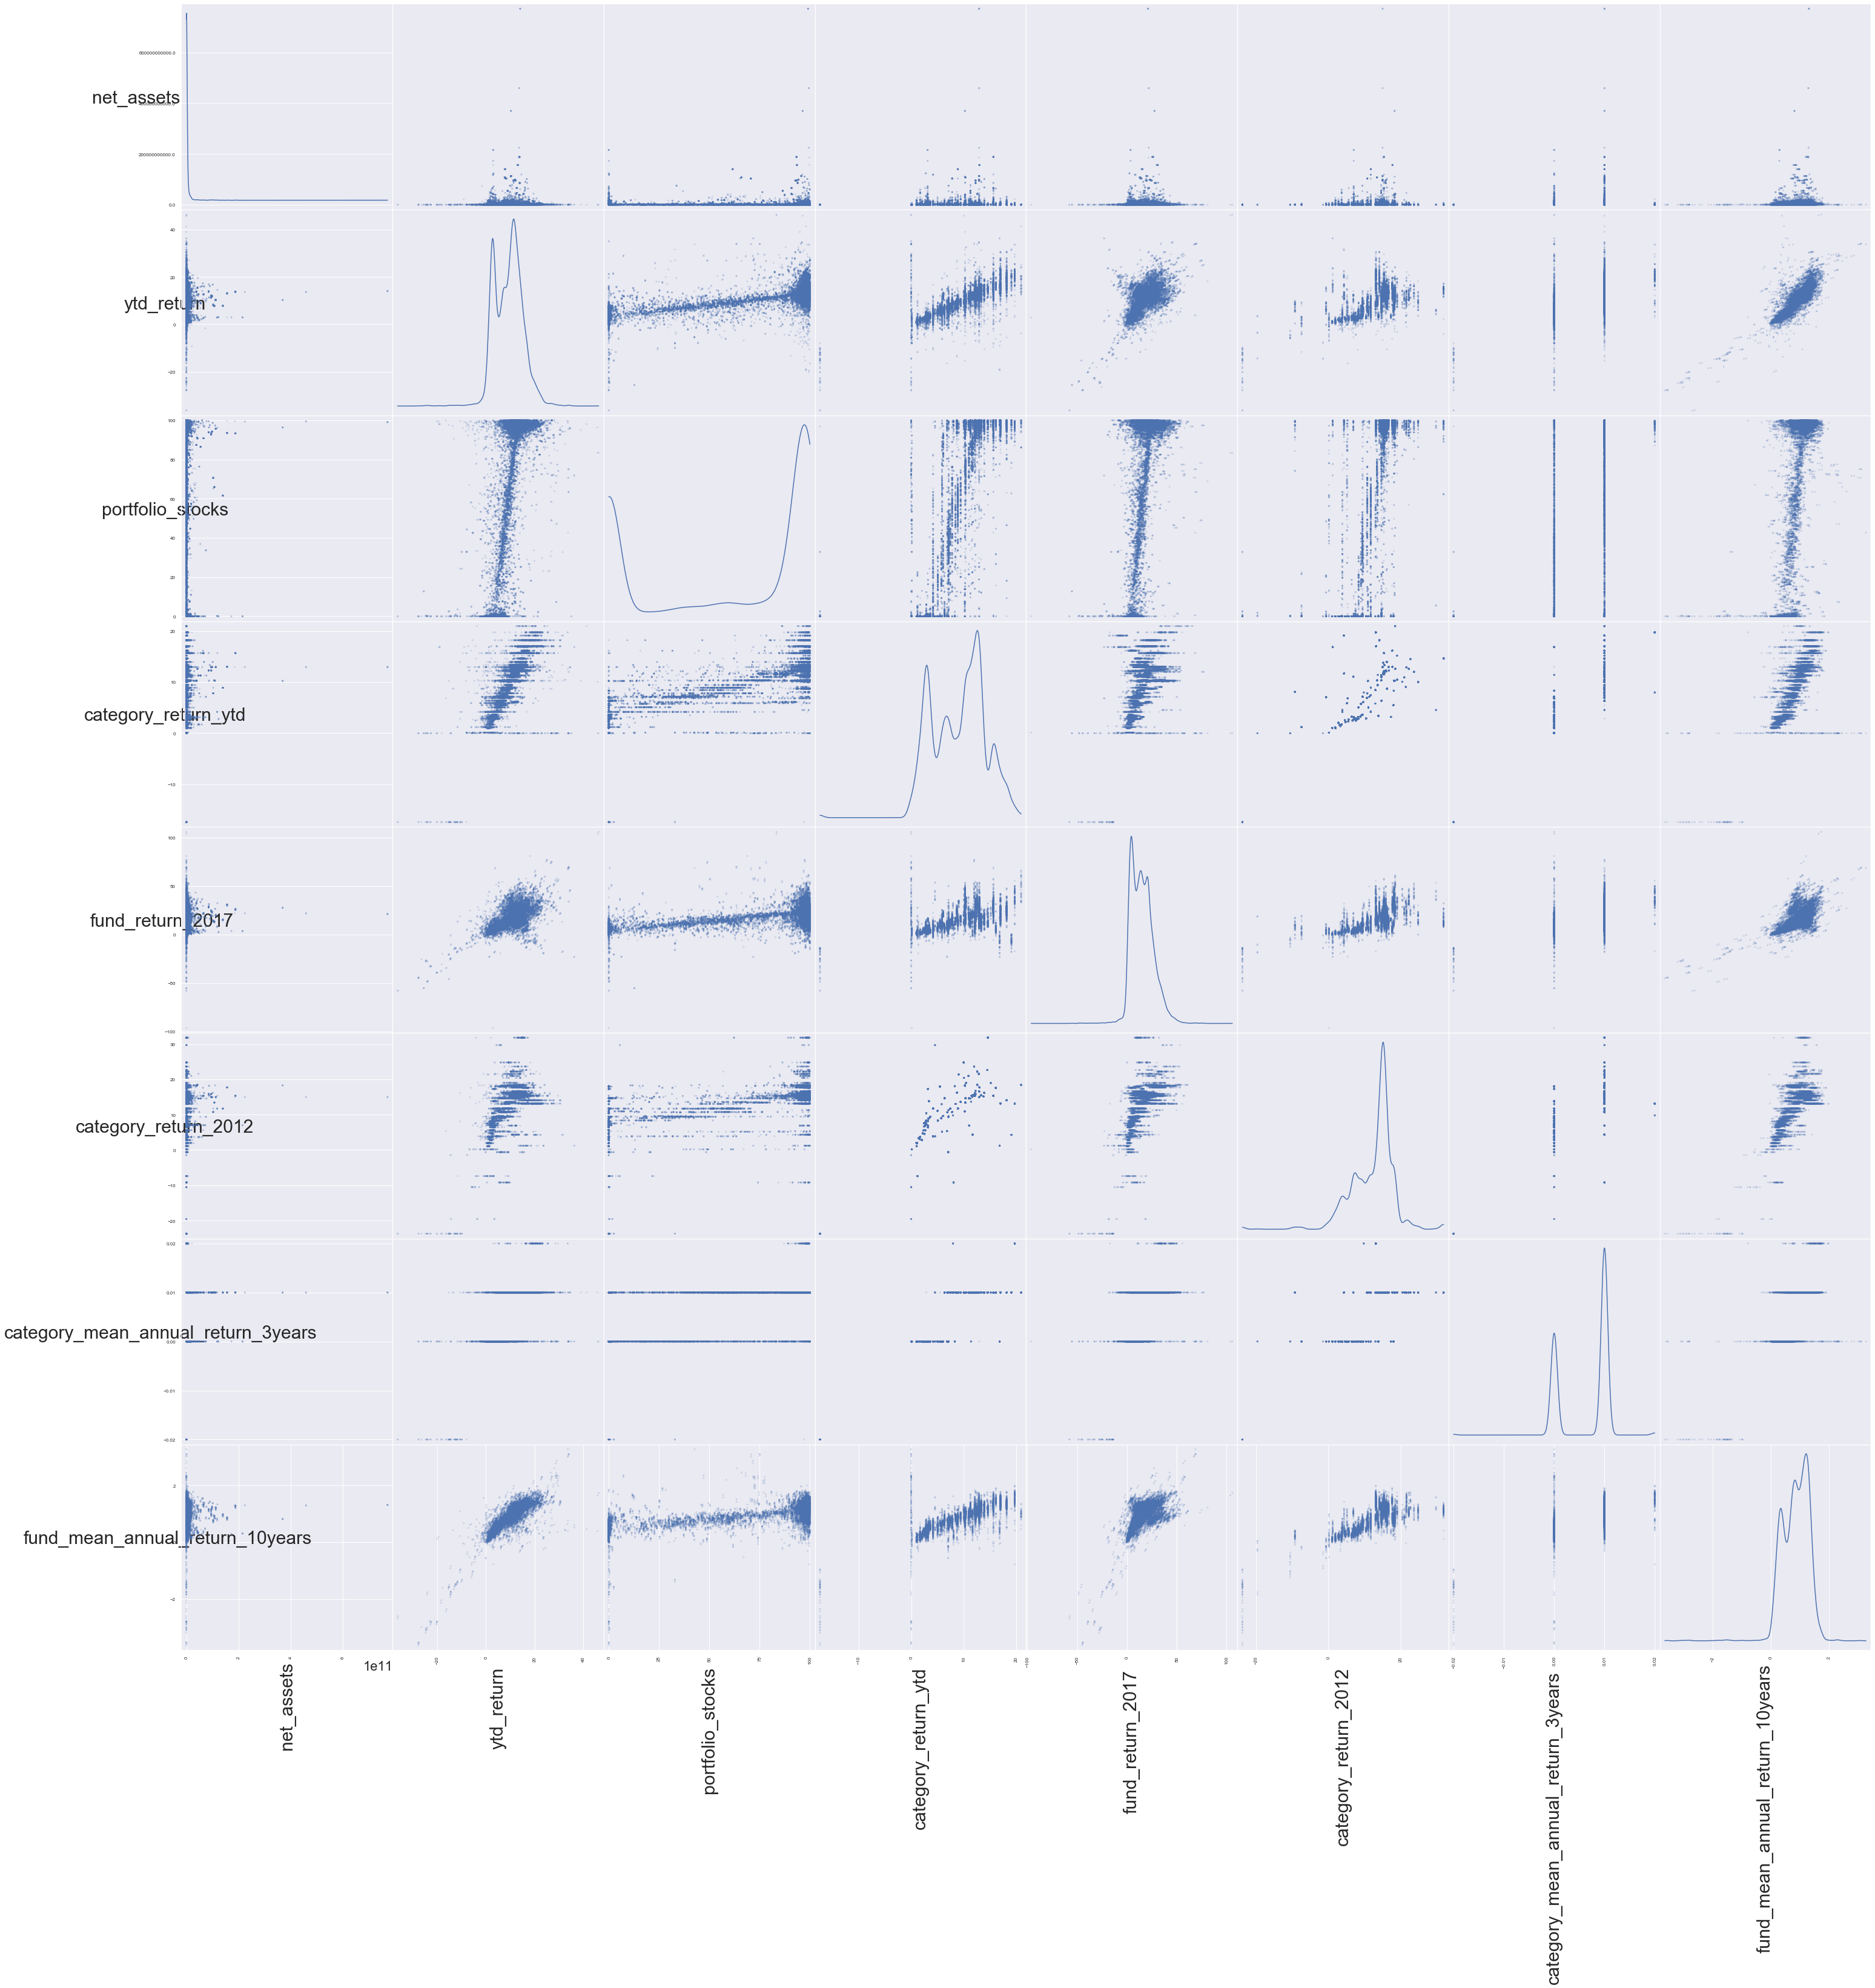

In [23]:
scatter_mtx(df_mf, cap=20)

### Dataset Cleaning

In [24]:
df_etf, df_mf = load_dataset() # Load again because of 'correlation_clean' function

C:\Users\NVukobrat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [25]:
def gaussian_clean(df, dataset_type):
    """

    :param df:
    :param dataset_type: etf or mf.
    :return:
    """
    # Fix NaN
    df.replace('', 'NaN', inplace=True)
    df.replace('nan', 'NaN', inplace=True)
    df.replace('NaN', np.nan, inplace=True)

    # As consequence of too many NaN values
    migrate_columns = [
        'fund_treynor_ratio_3years',
    ]
    if dataset_type == 'etf':
        migrate_columns += [
            'category_treynor_ratio_5years',
        ]
    elif dataset_type == 'mf':
        migrate_columns += [
            'price_cashflow',
            'price_sales',
            'price_earnings',
            'median_market_cap',
            'fund_treynor_ratio_5years',
            'fund_treynor_ratio_10years',
        ]

    # Join together numerical columns
    num_mean = df.select_dtypes(np.number)
    for col in migrate_columns:
        num_mean = num_mean.join(pd.to_numeric(df[col], errors="coerce"))

    # Columns with low-value information (ignored during initial analysis)
    low_info_categorical_columns = [
        'category',
        'currency',
        'fund_extended_name',
        'fund_family',
        'fund_name',
    ]
    if dataset_type == 'etf':
        low_info_categorical_columns += [
            'legal_type',
        ]
    elif dataset_type == 'mf':
        low_info_categorical_columns += [
            'inception_date',
        ]

    # Join together categorical (without low-value) columns
    str_mean = df[df.columns.difference(num_mean.columns)]
    for col in low_info_categorical_columns:
        str_mean = str_mean.drop(col, axis=1)

    # Populate empty values in categorical columns
    for col in list(str_mean):
        unique = str_mean[col].unique()
        unique = [x for x in unique if str(x) != 'nan']
        for i, value in enumerate(str_mean[col]):
            if value is np.nan:
                choice = random.choice(unique)
                str_mean[col].iloc[i] = choice

    # Encode categorical columns
    le = LabelEncoder()
    for col in str_mean:
        df[col] = le.fit_transform(str_mean[col])

    # One-hot encode categorical columns
    ohe = OneHotEncoder()
    for col in str_mean:
        unique = str_mean[col].unique()
        unique = [col + "_" + x for x in unique if str(x) != 'nan']
        enc_df = pd.DataFrame(ohe.fit_transform(df[[col]]).toarray(), columns=unique)
        df = df.drop(col, axis=1)
        df = df.join(enc_df)

    mu = num_mean.quantile(0)
    sigma = num_mean.std(axis=0)
    for col in num_mean:
        stack = num_mean[col]
        null_stack = stack[pd.isnull(stack)]
        ran = np.random.normal(mu[col], sigma[col], len(null_stack))
        stack.loc[null_stack.index] = ran
        df[col] = stack.values

    # Clean
    df_dropped = pd.DataFrame()
    for col in low_info_categorical_columns:
        df_dropped[col] = df[col].copy()
        df = df.drop(col, axis=1)

    return df, df_dropped

In [26]:
df_etf, df_etf_dropped = gaussian_clean(df_etf, 'etf')
   

In [27]:
   
df_mf, df_mf_dropped = gaussian_clean(df_mf, 'mf')

C:\Users\NVukobrat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Visualize after cleaning

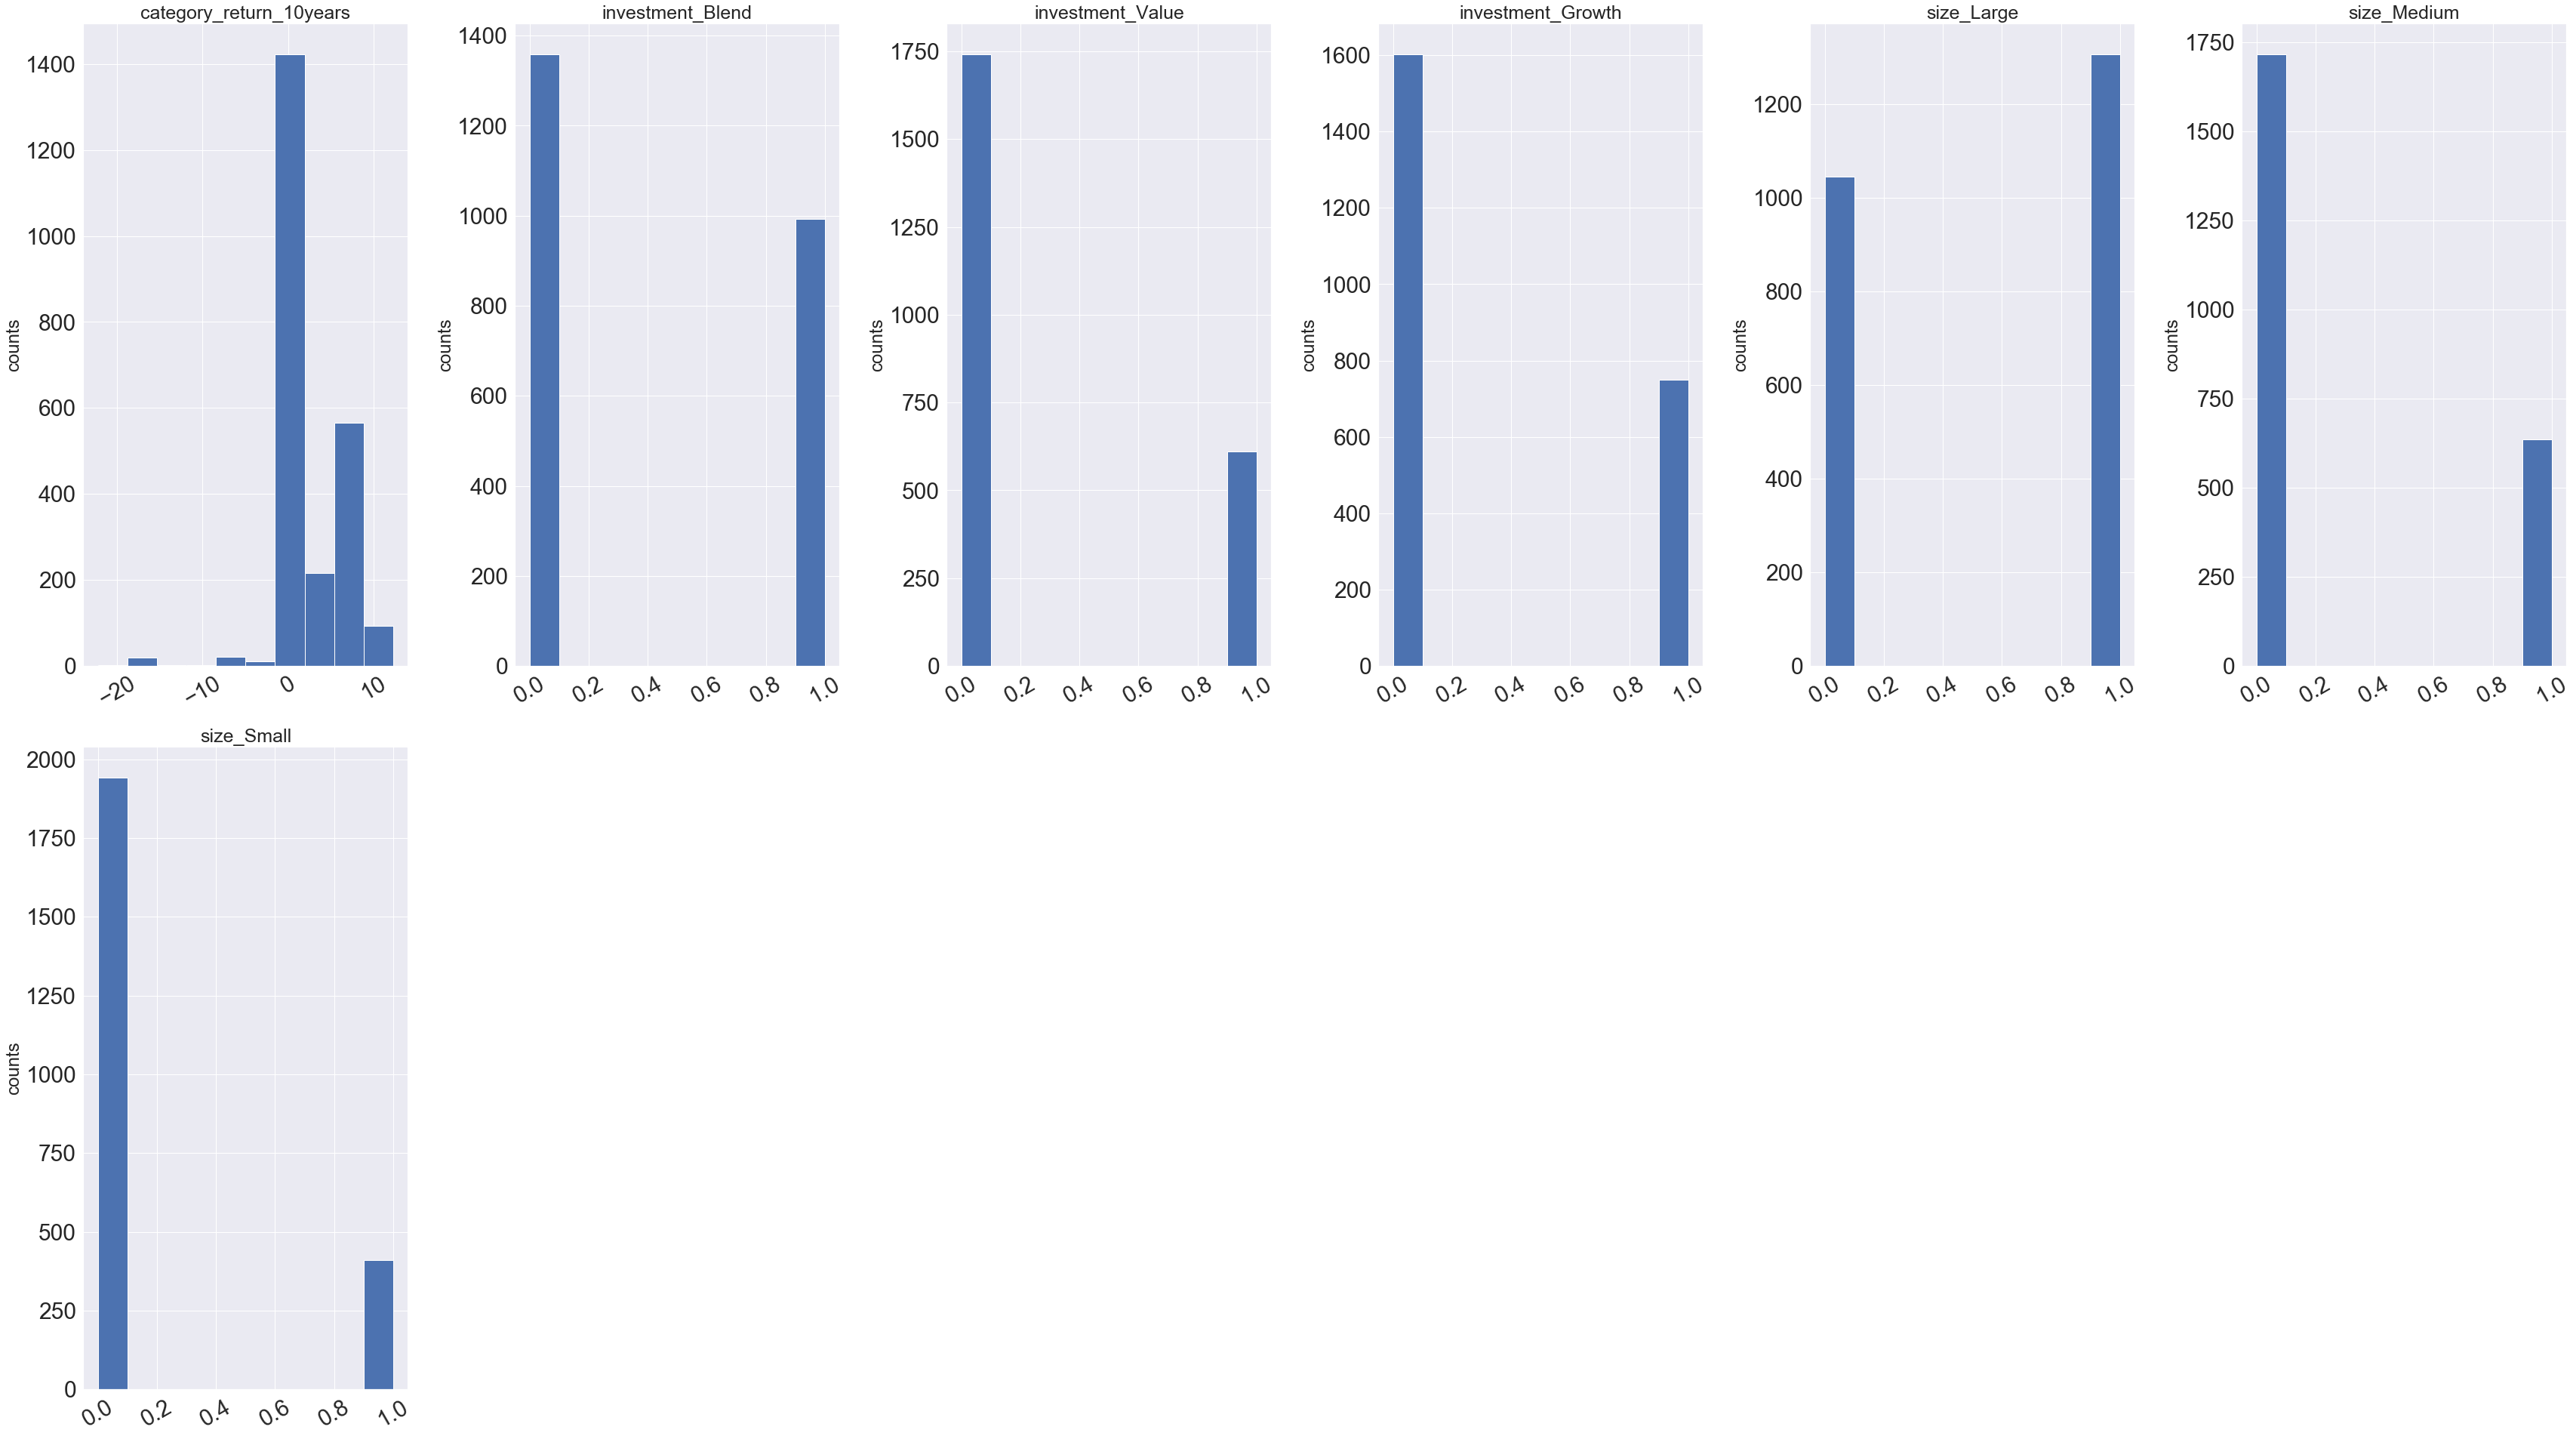

In [28]:
hist_bar_plot(df_etf)

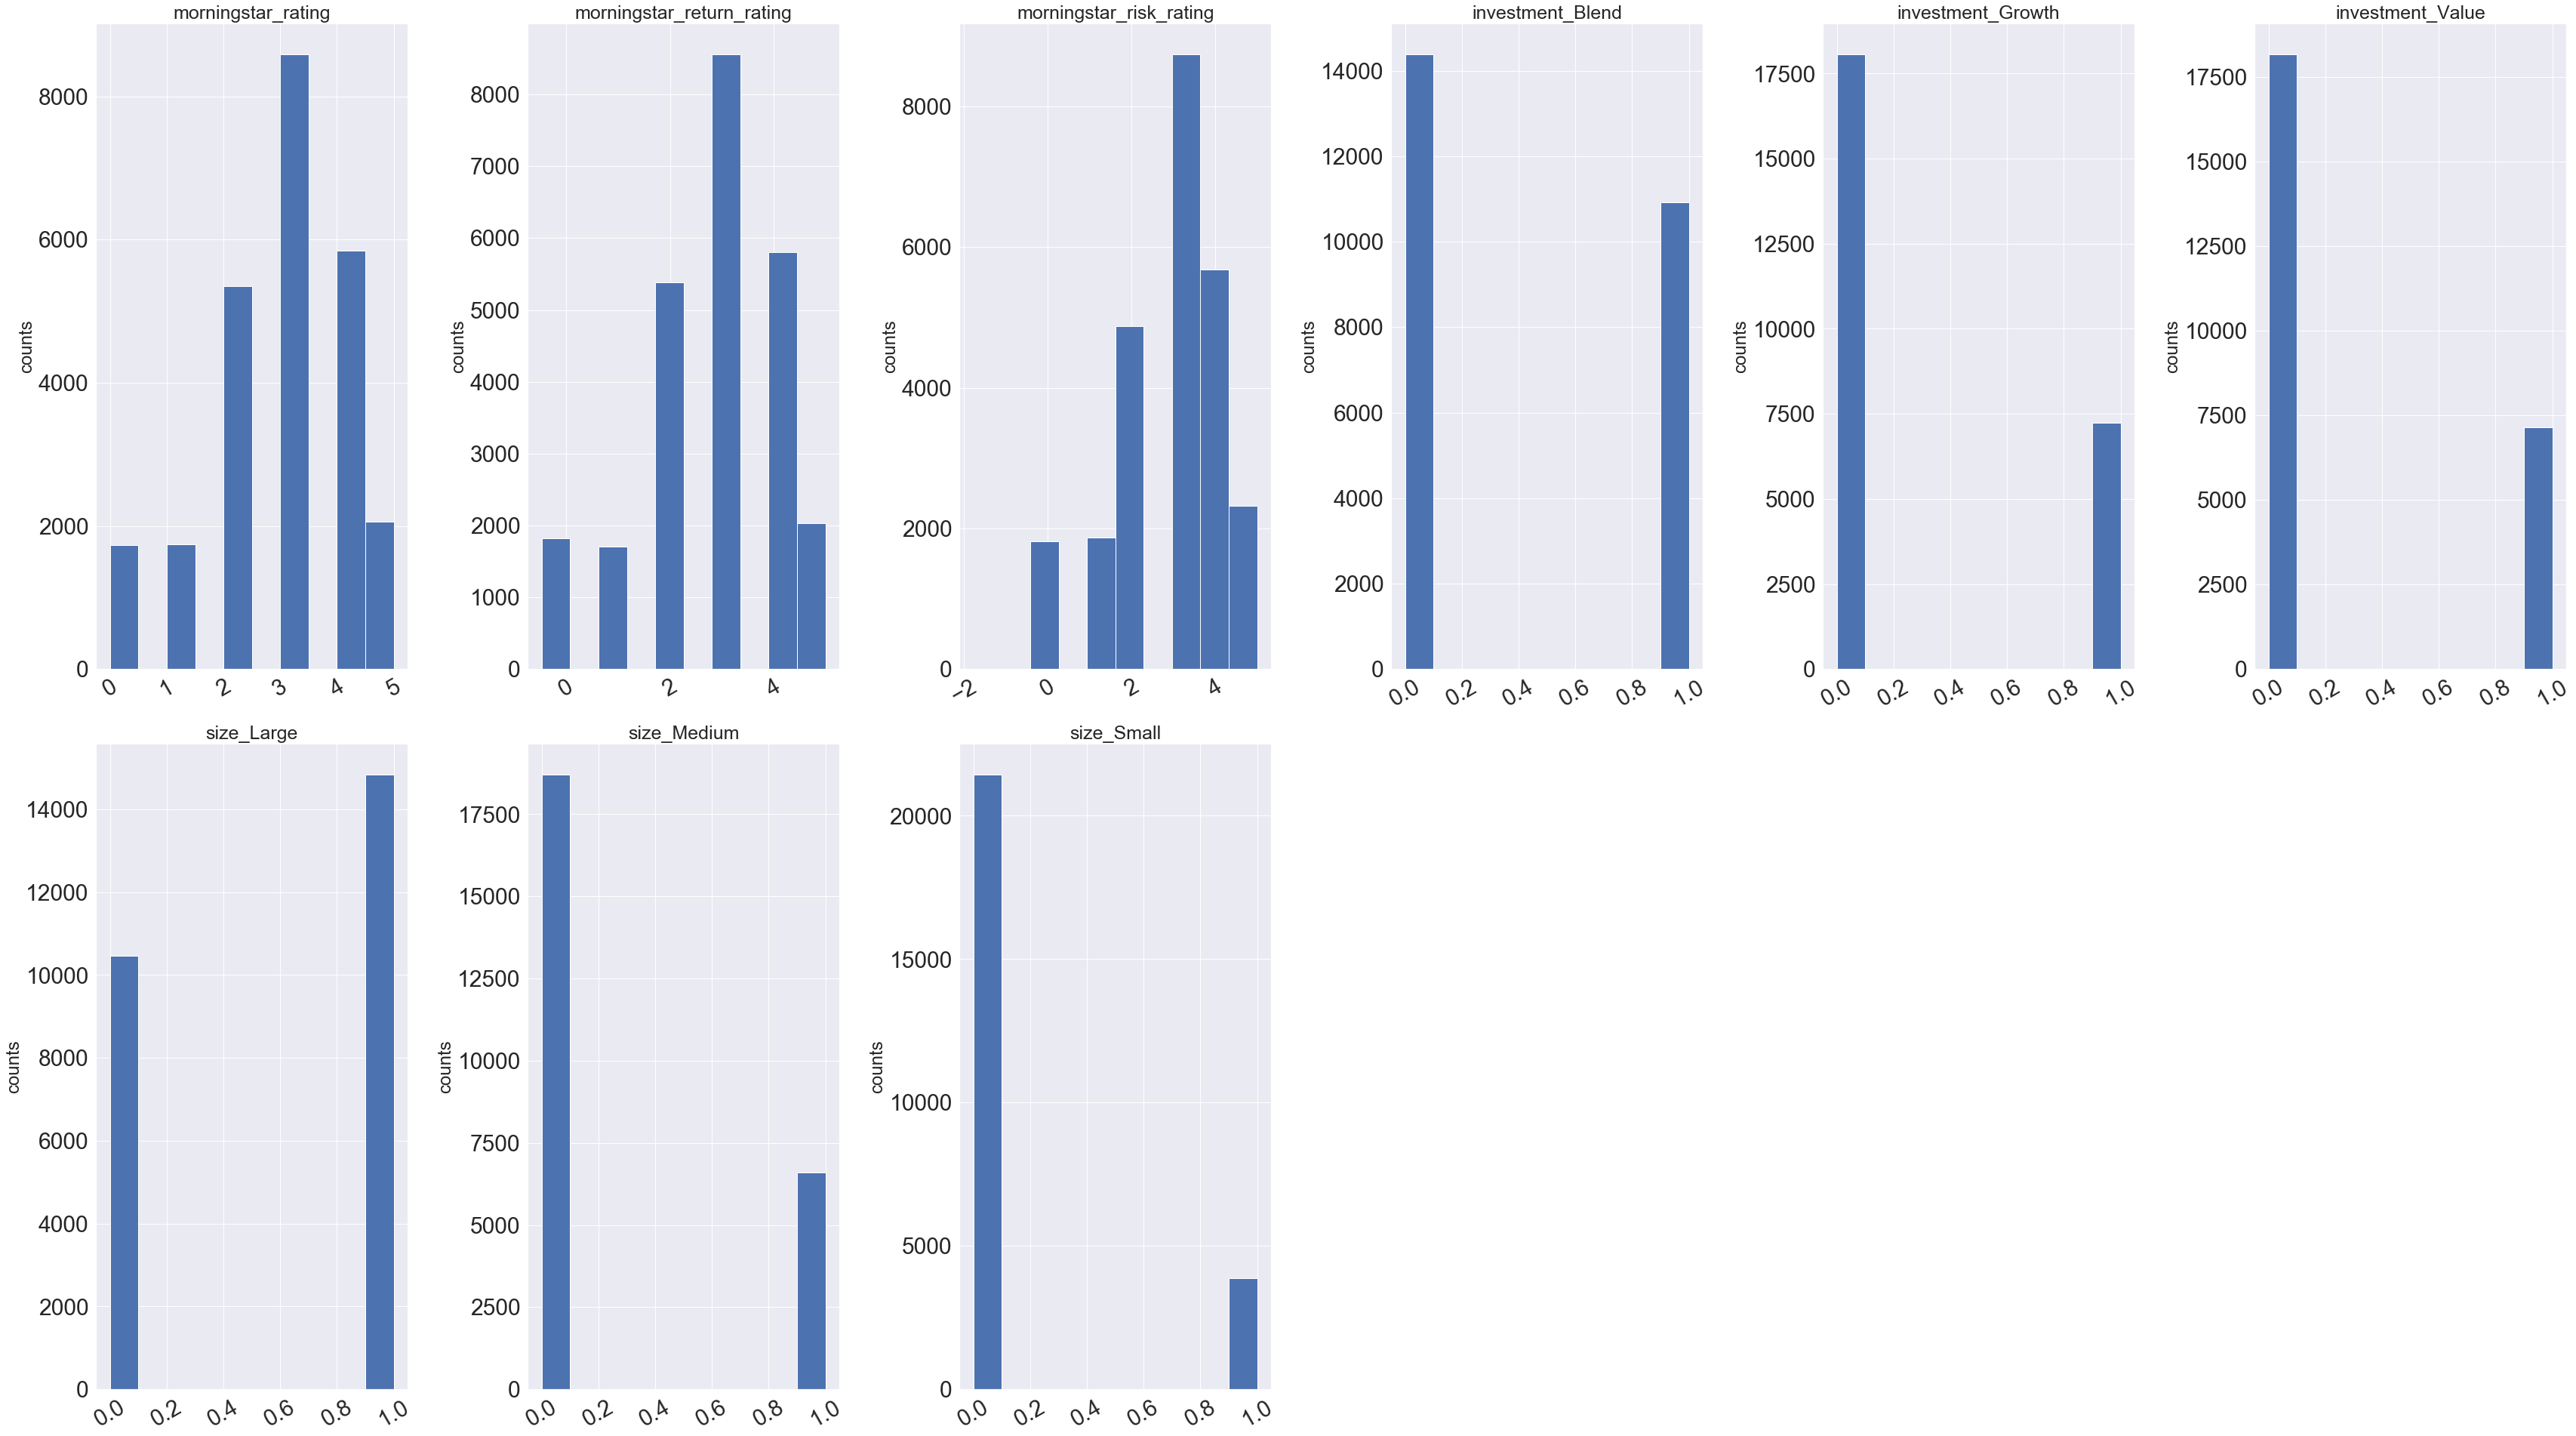

In [29]:
hist_bar_plot(df_mf)

### Training

In [30]:
regressors = [
    # svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    # linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    # linear_model.TheilSenRegressor(),
    linear_model.LinearRegression(),
]

In [31]:
def dataset_split(df, index_col):
    train, test = train_test_split(df, test_size=0.2, random_state=rnd_seed_state)
    y_train = train[index_col].copy()
    del train[index_col]

    y_test = test[index_col].copy()
    del test[index_col]

    return train, test, y_train, y_test

In [32]:
x_train, x_test, y_train, y_test = dataset_split(df_etf, index_col="ytd_return")

In [33]:
def run_models(regressors, x_train, x_test, y_train, y_test, res):
    print("Running models...")
    for model in regressors:
        start_time = time.time()
        model_name = type(model).__name__
        print("\tModel: {}".format(model_name))
        clf = model
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        res[model_name] = {}
        result_metrics(y_test, y_pred, res[model_name])
        print("\tExecution time: %s seconds\n" % (round((time.time() - start_time), 3)))
        
def result_metrics(actual, predicted, res, print_adjust=50):
    """
    ### Explained variance score
    If \hat{y} is the estimated target output,
    y the corresponding (correct) target output, and Var is Variance, the
    square of the standard deviation, then the explained variance is estimated
    as follow:

    explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}

    The best possible score is 1.0, lower values are worse.

    ### Max error
    The max_error function computes the maximum residual error, a metric that captures
    the worst case error between the predicted value and the true value. In a perfectly
    fitted single output regression model, max_error would be 0 on the training set
    and though this would be highly unlikely in the real world, this metric shows
    the extent of error that the model had when it was fitted.

    If \hat{y}_i is the predicted value of the i-th sample, and y_i is the
    corresponding true value, then the max error is defined as:

    \text{Max Error}(y, \hat{y}) = max(| y_i - \hat{y}_i |)

    ### Mean absolute error
    The mean_absolute_error function computes mean absolute error,
    a risk metric corresponding to the expected value of the absolute error
    loss or l1-norm loss.

    If \hat{y}_i is the predicted value of the -th sample, and y_i is the
    corresponding true value, then the mean absolute error (MAE) estimated
    over n_{samples} is defined as:

    \text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.

    ###  Mean squared error
    The mean_squared_error function computes mean square error,
    a risk metric corresponding to the expected value of the squared
    (quadratic) error or loss.

    If \hat{y}_i is the predicted value of the i-th sample,
    and y_i is the corresponding true value, then the mean squared
    error (MSE) estimated over n_{\text{samples}} is defined as:

    \text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.

    ### Median absolute error
    The median_absolute_error is particularly interesting because
    it is robust to outliers. The loss is calculated by taking the
    median of all absolute differences between the target and the
    prediction.

    If \hat{y}_i is the predicted value of the i-th sample and y_i
    is the corresponding true value, then the median absolute
    error (MedAE) estimated over n_{\text{samples}} is defined as:

    \text{MedAE}(y, \hat{y}) = \text{median}(\mid y_1 - \hat{y}_1 \mid, \ldots, \mid y_n - \hat{y}_n \mid).

    ### R² score, the coefficient of determination
    The r2_score function computes the coefficient of determination, usually denoted as R².

    It represents the proportion of variance (of y) that has been
    explained by the independent variables in the model. It provides
    an indication of goodness of fit and therefore a measure of how
    well unseen samples are likely to be predicted by the model,
    through the proportion of explained variance.

    As such variance is dataset dependent, R² may not be meaningfully
    comparable across different datasets. Best possible score is 1.0
    and it can be negative (because the model can be arbitrarily worse).
    A constant model that always predicts the expected value of y,
    disregarding the input features, would get a R² score of 0.0.

    If \hat{y}_i is the predicted value of the i-th sample and y_i
    is the corresponding true value for total  samples, the estimated
    R² is defined as:

    R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}

    where \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2

    Note that r2_score calculates unadjusted R² without correcting
    for bias in sample variance of y.

    ### Mean Poisson, Gamma, and Tweedie deviances
    The mean_tweedie_deviance function computes the mean Tweedie
    deviance error with a power parameter (p). This is a metric
    that elicits predicted expectation values of regression targets.

    If \hat{y}_i is the predicted value of the i-th sample, and y_i
    is the corresponding true value, then the mean Tweedie deviance
    error (D) for power p, estimated over n_{\text{samples}} is defined as:

    \begin{split}\text{D}(y, \hat{y}) = \frac{1}{n_\text{samples}}
    \sum_{i=0}^{n_\text{samples} - 1}
    \begin{cases}
    (y_i-\hat{y}_i)^2, & \text{for }p=0\text{ (Normal)}\\
    2(y_i \log(y/\hat{y}_i) + \hat{y}_i - y_i),  & \text{for}p=1\text{ (Poisson)}\\
    2(\log(\hat{y}_i/y_i) + y_i/\hat{y}_i - 1),  & \text{for}p=2\text{ (Gamma)}\\
    2\left(\frac{\max(y_i,0)^{2-p}}{(1-p)(2-p)}-
    \frac{y\,\hat{y}^{1-p}_i}{1-p}+\frac{\hat{y}^{2-p}_i}{2-p}\right),
    & \text{otherwise}
    \end{cases}\end{split}

    ### Reference
    https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

    :param actual:
    :param predicted:
    :param print_adjust:
    :return:
    """
    evs = metrics.explained_variance_score(actual, predicted)
    print("\t\tExplained variance score ".ljust(print_adjust, '.') + " {}".format(evs))
    res["EVS"] = evs

    me = metrics.max_error(actual, predicted)
    print("\t\tMax error ".ljust(print_adjust, '-') + " {}".format(me))
    res["ME"] = me

    mean_ae = metrics.mean_absolute_error(actual, predicted)
    print("\t\tMean absolute error ".ljust(print_adjust, '.') + " {}".format(mean_ae))
    res["MeanAE"] = mean_ae

    mse = metrics.mean_squared_error(actual, predicted)
    print("\t\tMean squared error ".ljust(print_adjust, '-') + " {}".format(mse))
    res["MSE"] = mse

    median_ae = metrics.median_absolute_error(actual, predicted)
    print("\t\tMedian absolute error ".ljust(print_adjust, '.') + " {}".format(median_ae))
    res["MedianAE"] = median_ae

    r2 = metrics.r2_score(actual, predicted)
    print("\t\tR² score, the coefficient of determination ".ljust(print_adjust, '-') + " {}".format(r2))
    res["R2"] = r2

    mtd = metrics.mean_tweedie_deviance(actual, predicted)
    print("\t\tMean Poisson, Gamma, and Tweedie deviances: ".ljust(50, '.') + " {}".format(mtd))
    res["MTD"] = mtd    

In [34]:
res = {
    'ETF': {},
    'MF': {},
}
run_models(regressors, x_train, x_test, y_train, y_test, res['ETF'])

Running models...
	Model: SGDRegressor
		Explained variance score ....................... -2.4714071257492806e+60
		Max error -------------------------------------- 1.0059773422615518e+33
		Mean absolute error ............................ 2.569156853773832e+30
		Mean squared error ----------------------------- 2.1572680788540308e+63
		Median absolute error .......................... 1.8525257723964522e+28
		R² score, the coefficient of determination ----- -2.477698642461464e+60
		Mean Poisson, Gamma, and Tweedie deviances: .... 2.1572680788540308e+63
	Execution time: 0.018 seconds

	Model: BayesianRidge
		Explained variance score ....................... 0.7219074031671253
		Max error -------------------------------------- 67.0965305331385
		Mean absolute error ............................ 9.280663274722663
		Mean squared error ----------------------------- 242.81575571589426
		Median absolute error .......................... 4.27374159345324
		R² score, the coefficient of determination

In [35]:
x_train, x_test, y_train, y_test = dataset_split(df_mf, index_col="ytd_return")

In [36]:
run_models(regressors, x_train, x_test, y_train, y_test, res['MF'])

Running models...
	Model: SGDRegressor
		Explained variance score ....................... -7.608913623497283e+54
		Max error -------------------------------------- 7.571949038450314e+29
		Mean absolute error ............................ 3.4107247864029727e+27
		Mean squared error ----------------------------- 3.2558695124272004e+56
		Median absolute error .......................... 4.5016996962285756e+26
		R² score, the coefficient of determination ----- -7.876648208710142e+54
		Mean Poisson, Gamma, and Tweedie deviances: .... 3.2558695124272004e+56
	Execution time: 0.285 seconds

	Model: BayesianRidge
		Explained variance score ....................... 0.8968144958373974
		Max error -------------------------------------- 42.445069106400695
		Mean absolute error ............................ 0.5325356840019029
		Mean squared error ----------------------------- 4.265976602404646
		Median absolute error .......................... 0.2424984569173141
		R² score, the coefficient of determinat

### Results

In [37]:
def visualize_results(res):
    # Restructure results
    data = []
    for k_fund, v_fund in res.items():
        for k_alg, v_alg in res[k_fund].items():
            for k_met, v_met in res[k_fund][k_alg].items():
                data.append([k_fund, k_alg, k_met, v_met])
    df = pd.DataFrame(data, columns=["Fund Type", "Model Name", "Metric", "Score"])

    # With Metric in focus
    print_md("### Metrics")
    plt.figure(figsize=(40, 30))
    for i, m in enumerate(df["Metric"].unique()):
        plt.subplot(3, 3, i + 1)

        # Define limits
        df_etf = df[(df["Fund Type"] == "ETF") & (df["Metric"] == m)]
        df_etf_lim_min = min(df_etf["Score"])
        df_etf_lim_max = max(df_etf["Score"])

        df_mf = df[(df["Fund Type"] == "MF") & (df["Metric"] == m)]
        df_mf_lim_min = min(df_mf["Score"])
        df_mf_lim_max = max(df_mf["Score"])

        if df_etf_lim_max > df_mf_lim_max:
            lim_max = df_mf_lim_max
        else:
            lim_max = df_etf_lim_max

        if df_etf_lim_min < df_mf_lim_min:
            lim_min = df_mf_lim_min
        else:
            lim_min = df_etf_lim_min

        if lim_min == 0 or lim_max == 0:
            pass
        elif lim_min * 10 < lim_max:
            lim_max = lim_min * 10
        elif lim_max * 10 < lim_min:
            lim_min = lim_max * 10

        # Plot config
        df_group = df[df["Metric"] == m]
        lp = sns.lineplot(x="Model Name", y="Score", hue="Fund Type", data=df_group)
        lp.set(ylim=(lim_min, lim_max))
        lp.set_title(m)
        plt.xticks(rotation=30)
    plt.show()

    # With Model in focus
    print_md("### Models")
    plt.figure(figsize=(40, 30))
    for i, mn in enumerate(df["Model Name"].unique()):
        plt.subplot(3, 3, i + 1)

        # Plot config
        df_group = df[df["Model Name"] == mn]
        lp = sns.lineplot(x="Metric", y="Score", hue="Fund Type", data=df_group)
        lp.set_title(mn)
        plt.xticks(rotation=30)
    plt.show()


def print_md(string):
    display(Markdown(string))

### Metrics

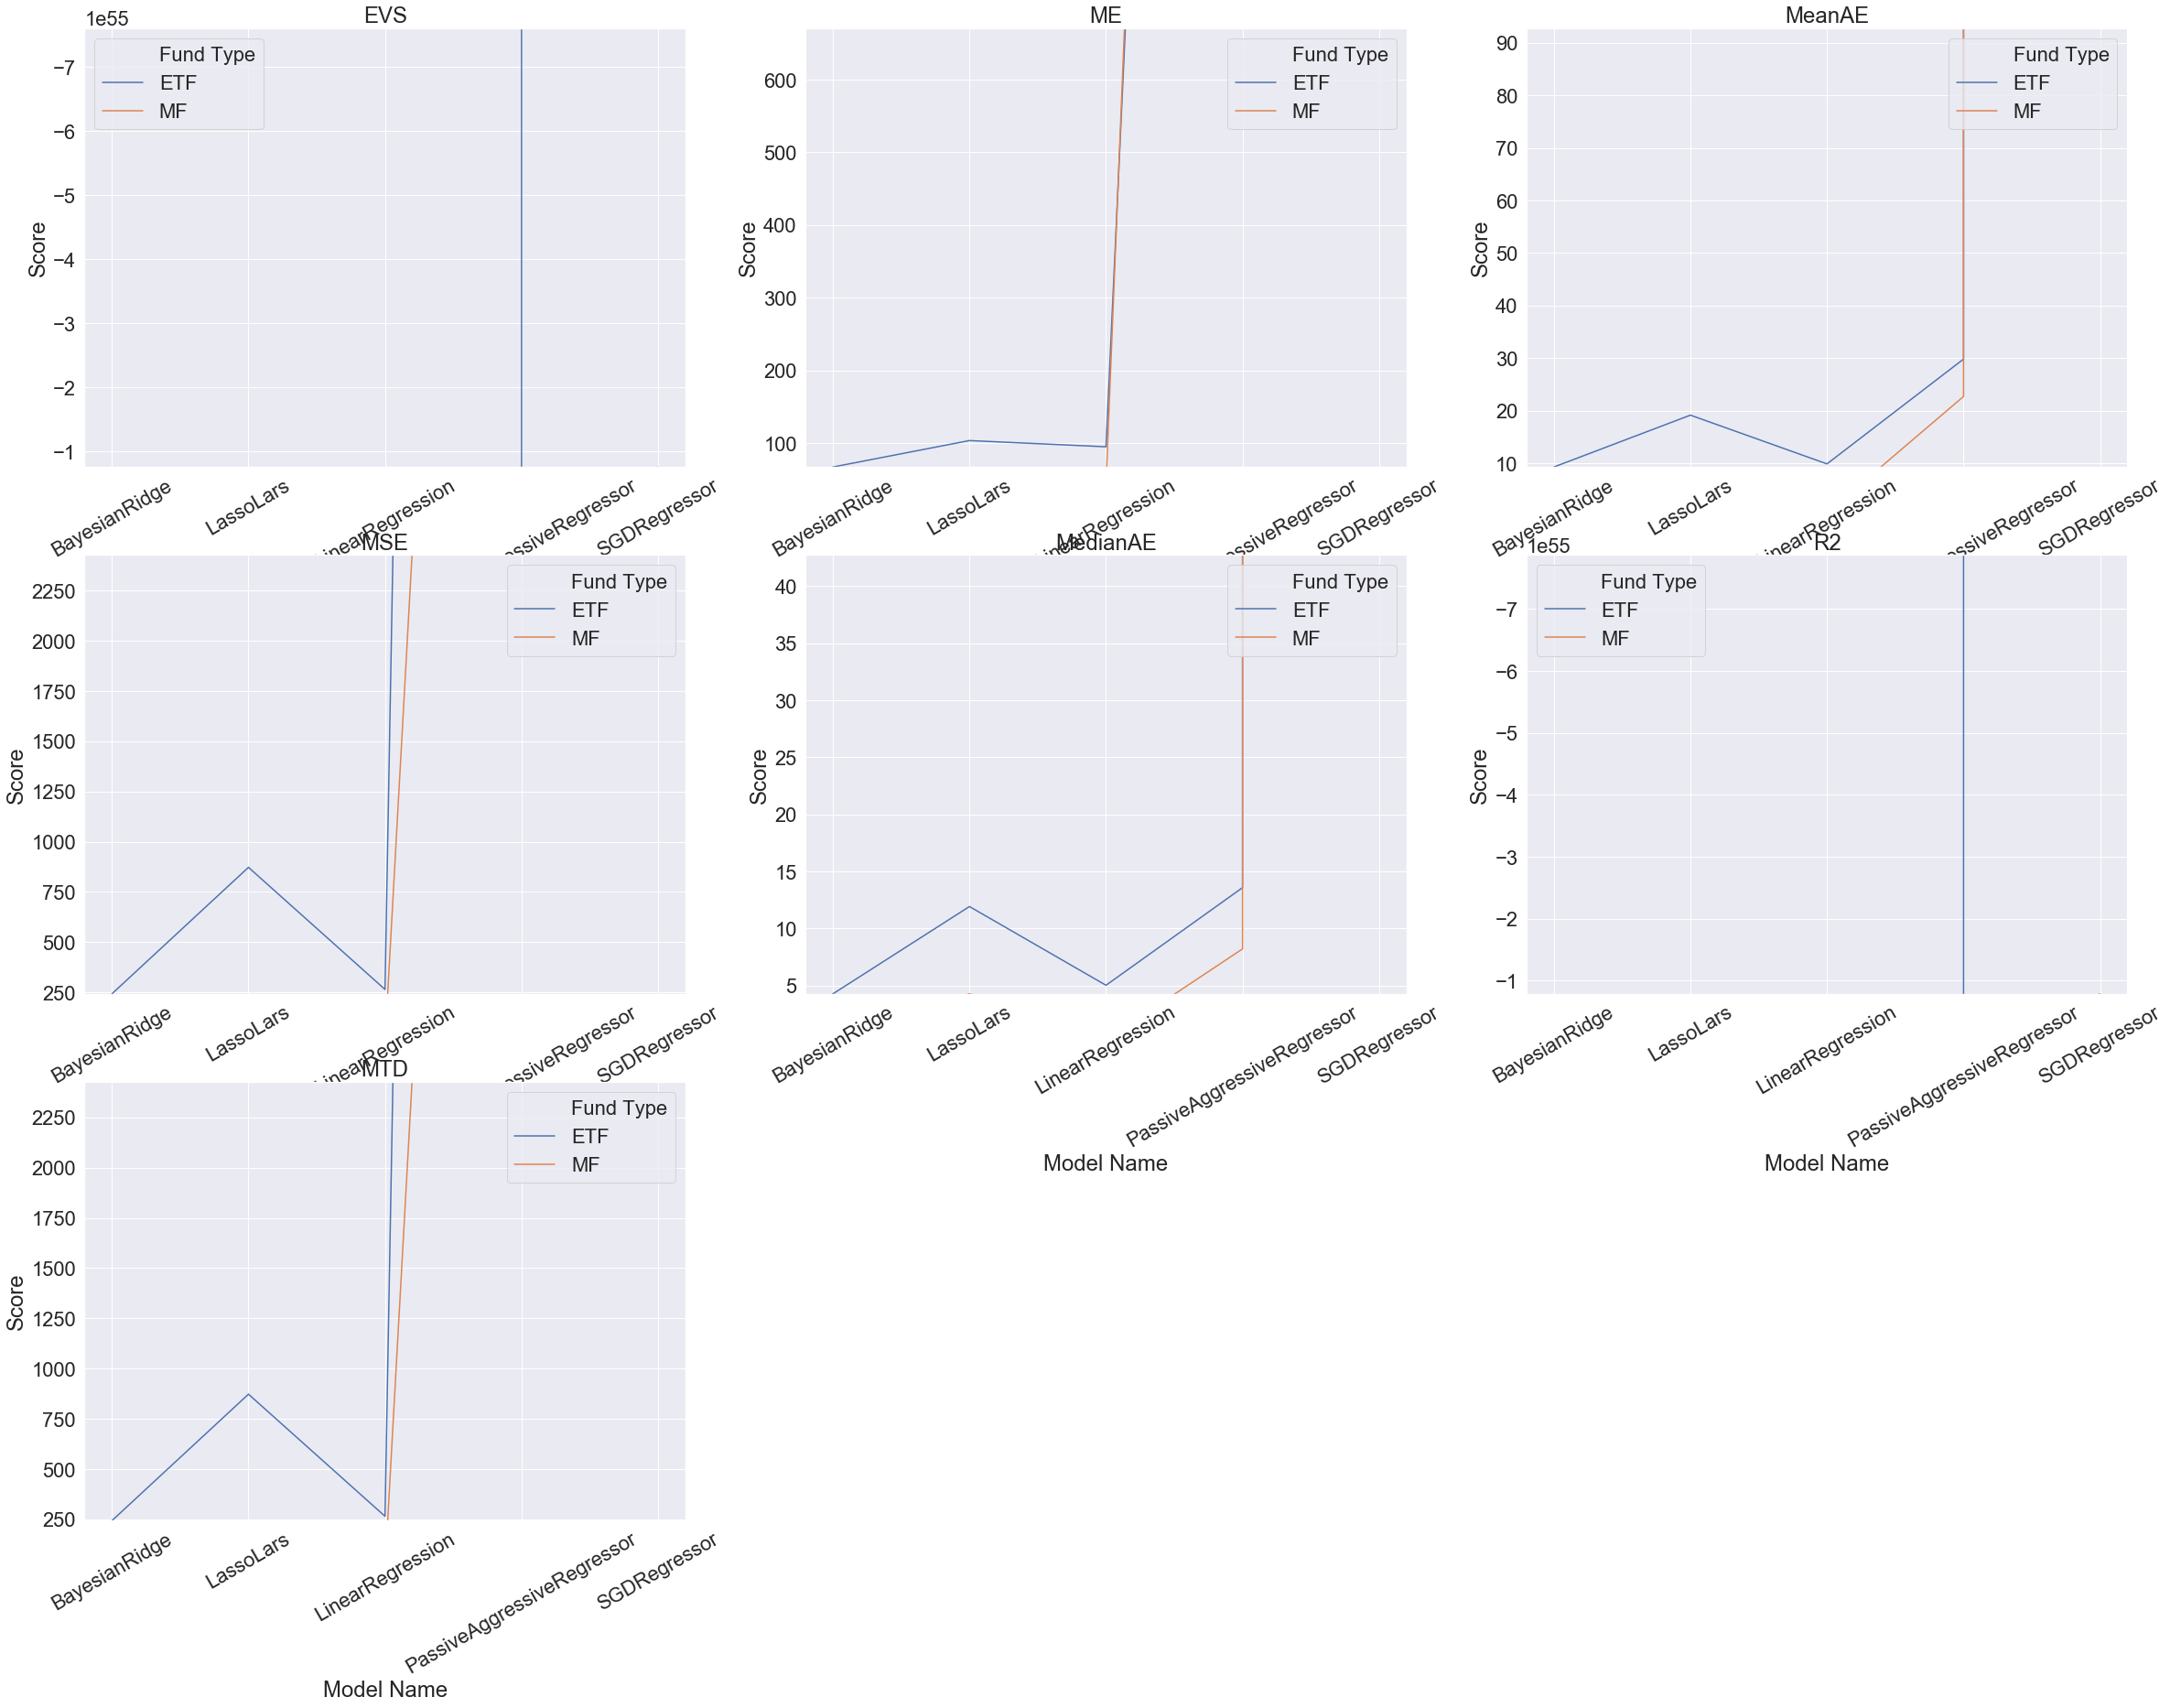

### Models

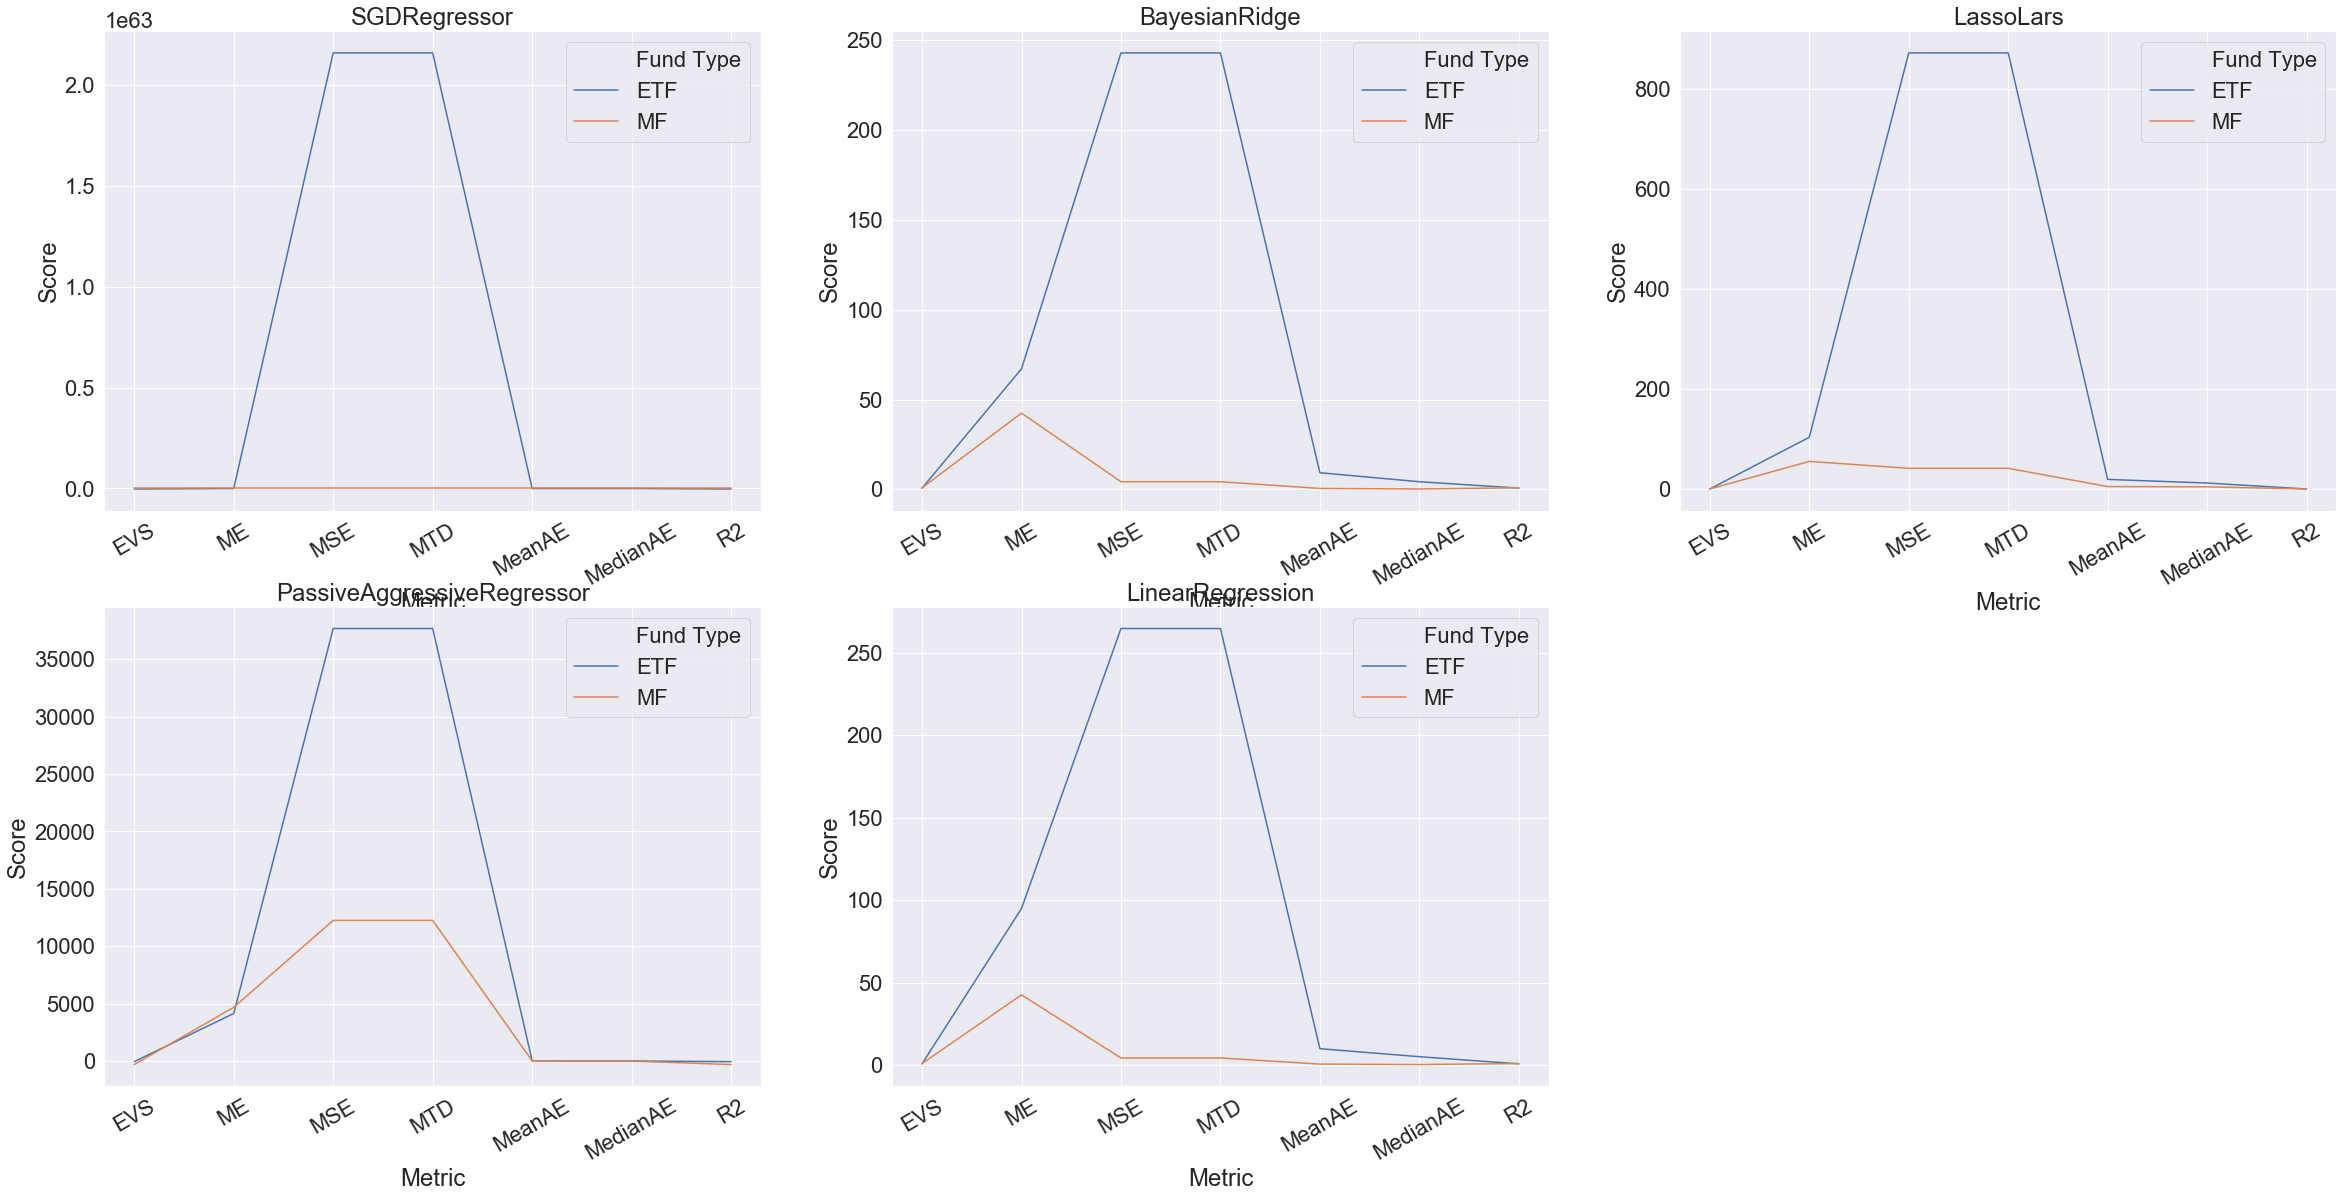

In [38]:
visualize_results(res)

### Applying Correlation clean

In [39]:
df_etf = correlation_clean(df_etf)

In [40]:
df_mf = correlation_clean(df_mf, threshold=(-0.9, -0.6, 0.6, 0.9))

In [41]:
res = {
    'ETF': {},
    'MF': {},
}
run_models(regressors, x_train, x_test, y_train, y_test, res['ETF'])

Running models...
	Model: SGDRegressor
		Explained variance score ....................... -3.1469432579772126e+55
		Max error -------------------------------------- 1.5398939457310307e+30
		Mean absolute error ............................ 6.936330952958388e+27
		Mean squared error ----------------------------- 1.346583378121287e+57
		Median absolute error .......................... 9.155027418239573e+26
		R² score, the coefficient of determination ----- -3.257674643493577e+55
		Mean Poisson, Gamma, and Tweedie deviances: .... 1.346583378121287e+57
	Execution time: 0.329 seconds

	Model: BayesianRidge
		Explained variance score ....................... 0.8968144958373974
		Max error -------------------------------------- 42.445069106400695
		Mean absolute error ............................ 0.5325356840019029
		Mean squared error ----------------------------- 4.265976602404646
		Median absolute error .......................... 0.2424984569173141
		R² score, the coefficient of determinatio

In [42]:
x_train, x_test, y_train, y_test = dataset_split(df_mf, index_col="ytd_return")

In [43]:
run_models(regressors, x_train, x_test, y_train, y_test, res['MF'])

Running models...
	Model: SGDRegressor
		Explained variance score ....................... -1.2638068514951844e+57
		Max error -------------------------------------- 9.7585818272237e+30
		Mean absolute error ............................ 4.395676297881805e+28
		Mean squared error ----------------------------- 5.407855051294607e+58
		Median absolute error .......................... 5.801703710805822e+27
		R² score, the coefficient of determination ----- -1.3082763802468629e+57
		Mean Poisson, Gamma, and Tweedie deviances: .... 5.407855051294607e+58
	Execution time: 0.07 seconds

	Model: BayesianRidge
		Explained variance score ....................... 0.6523767392414797
		Max error -------------------------------------- 54.69267552040455
		Mean absolute error ............................ 1.8584364691163162
		Mean squared error ----------------------------- 14.369321865294848
		Median absolute error .......................... 1.0047142722946643
		R² score, the coefficient of determination -

### Metrics

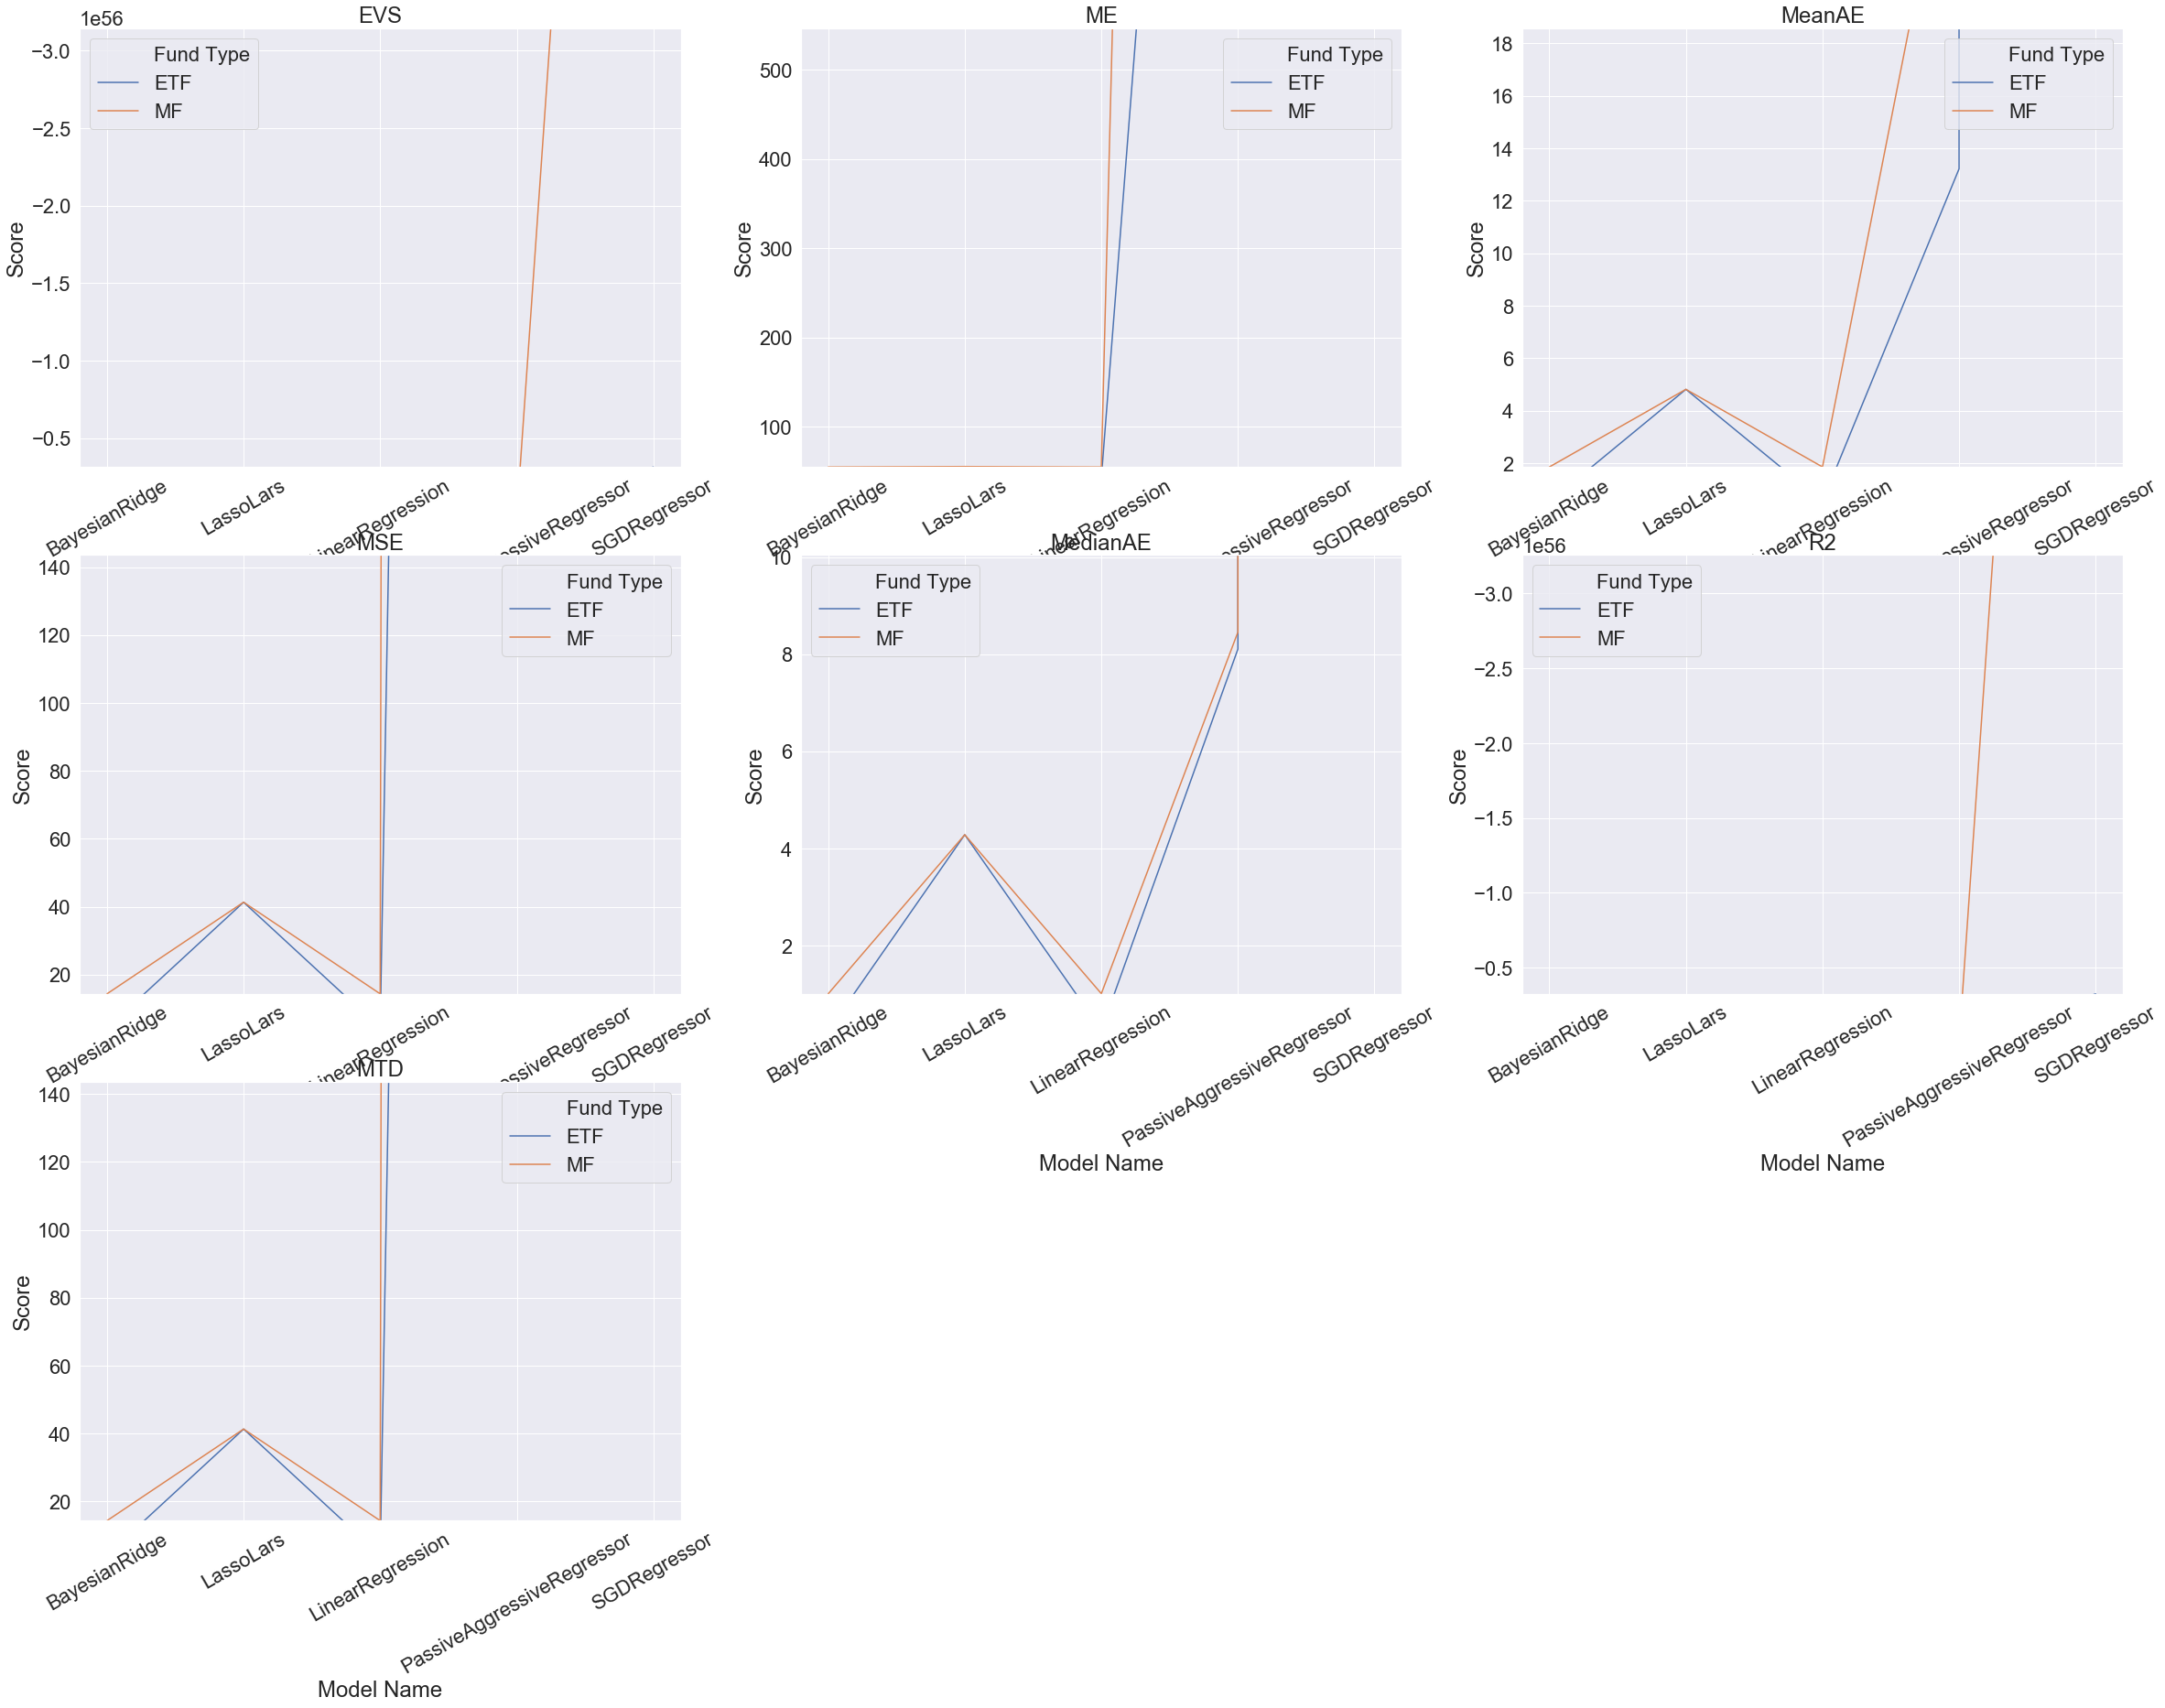

### Models

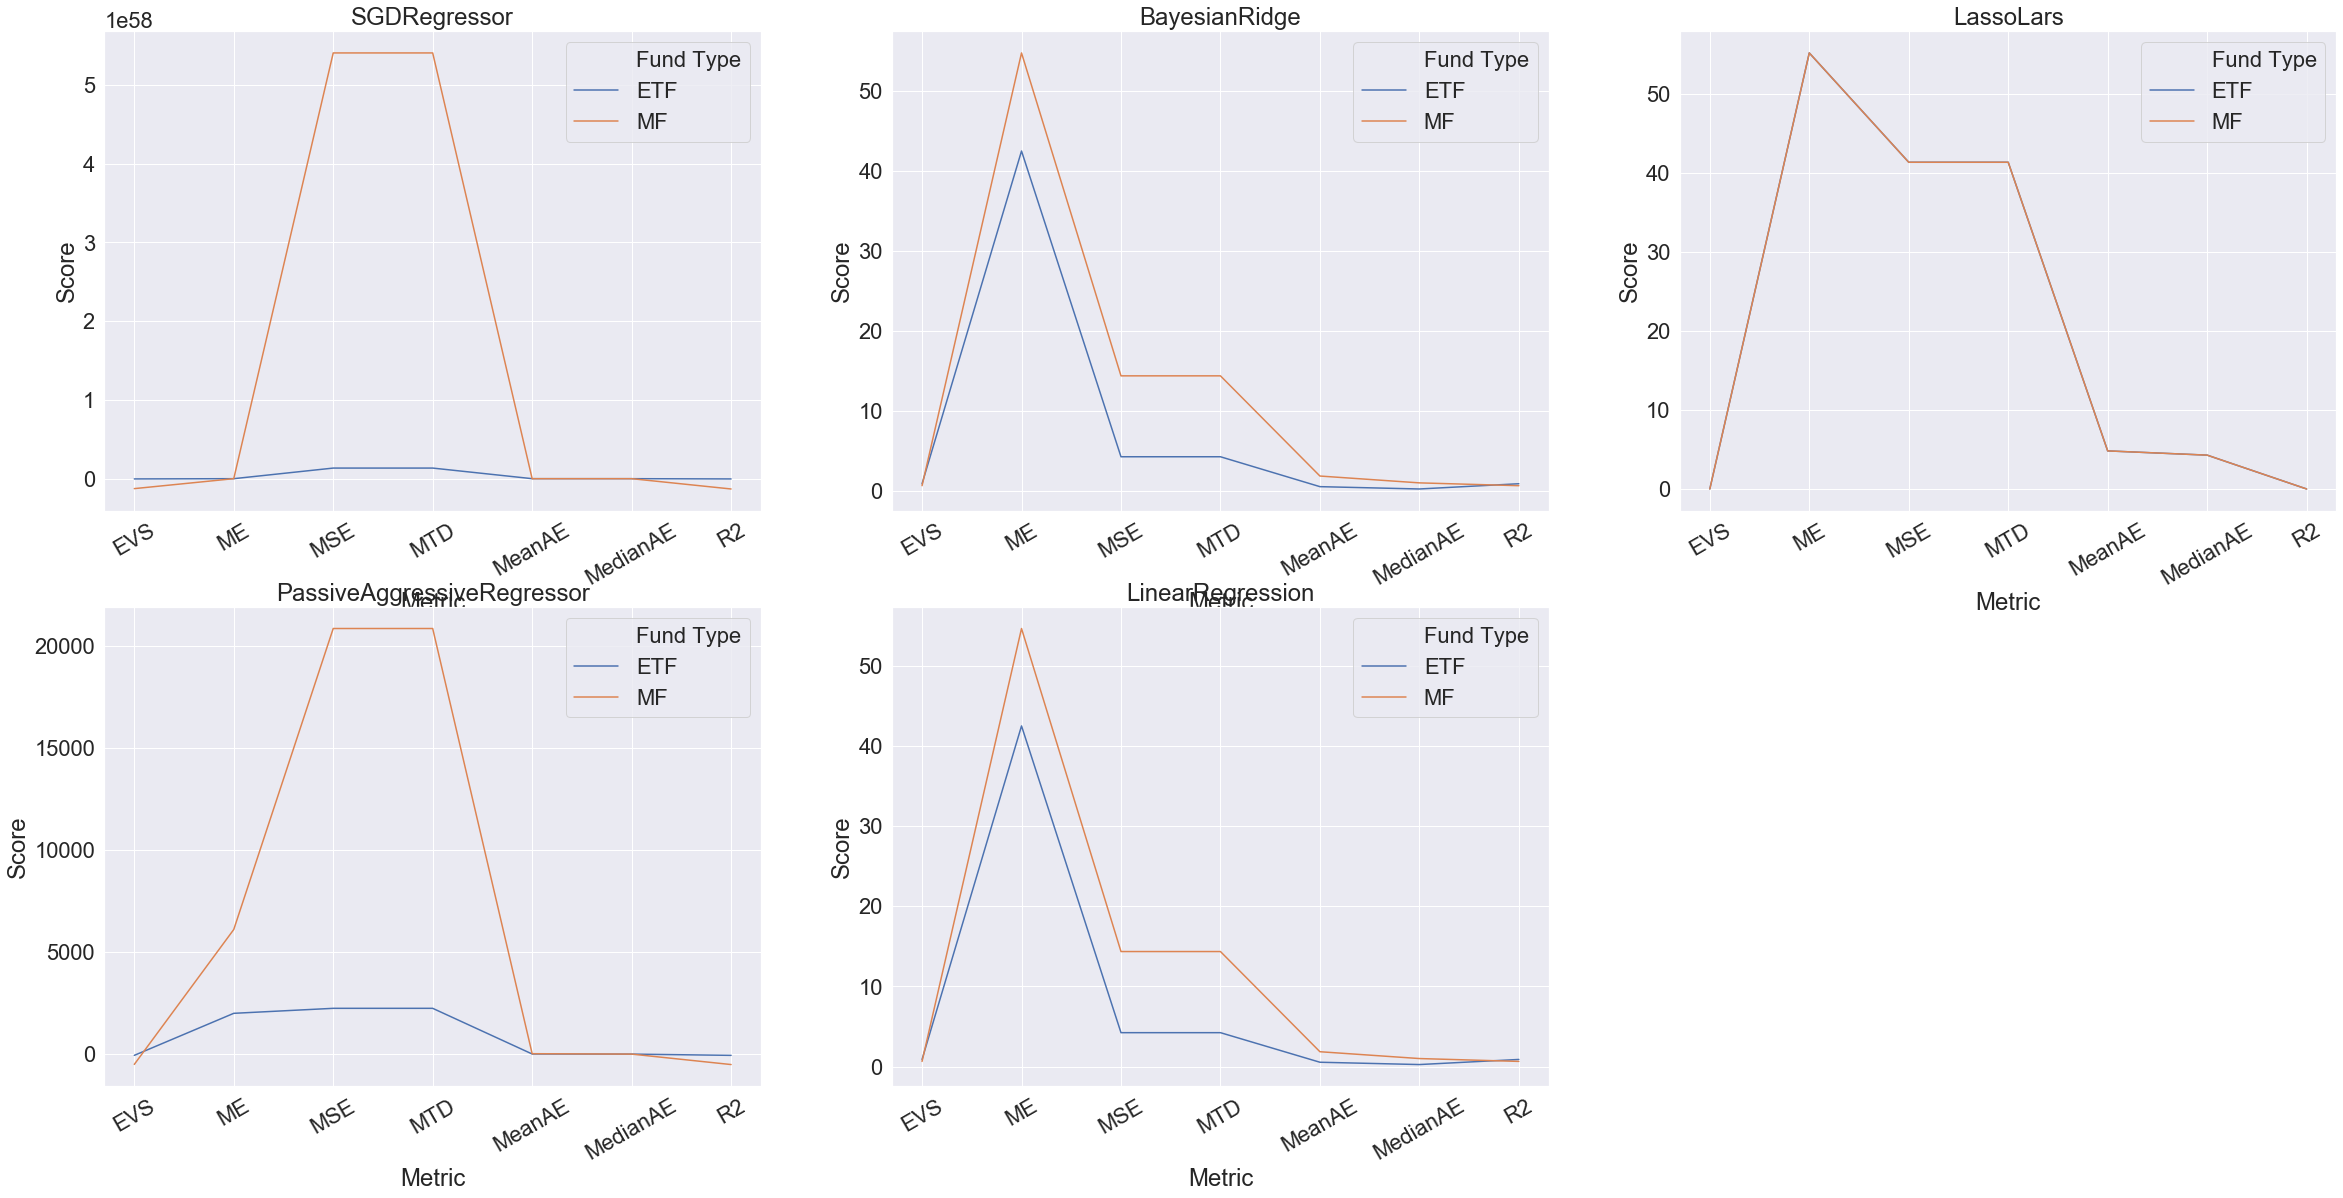

In [44]:
visualize_results(res)